<a href="https://colab.research.google.com/github/overred0704/Traffic_accident_detection_from_VD/blob/master/Model_training.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Preliminary work

##install package

In [ ]:
#need restart the kernal
!pip install -U imbalanced-learn
!pip install ctgan

Requirement already up-to-date: imbalanced-learn in /usr/local/lib/python3.7/dist-packages (0.8.0)


##build some functions

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
#boxing
from sklearn import preprocessing
def box(data):
  col = data.columns
  coll = col.to_list()
  mm = preprocessing.MinMaxScaler( feature_range = (0,1))
  pic = mm.fit_transform(data)

  plt.figure(figsize=(10,10))
  plt.xticks(rotation=90)
  sns.boxplot(data=pic)


  return plt.show()

In [ ]:
#visualize confusion metrix
import itertools
from sklearn.metrics import confusion_matrix
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Oranges):

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.figure(figsize = (5, 5))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title, size = 24)
    plt.colorbar(aspect=4)
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45, size = 14)
    plt.yticks(tick_marks, classes, size = 14)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    
    # Labeling the plot
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt), fontsize = 20,
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
        
    plt.grid(None)
    plt.tight_layout()
    plt.ylabel('True label', size = 18)
    plt.xlabel('Predicted label', size = 18)

##load data

In [ ]:
import numpy as np
import pandas as pd

In [ ]:
#download data
!gdown --id '1eGYRxc9vGE2qot7RRWhXVpOznPN0B3iq' --output dataset.csv

Downloading...
From: https://drive.google.com/uc?id=1eGYRxc9vGE2qot7RRWhXVpOznPN0B3iq
To: /content/dataset.csv
11.5MB [00:00, 69.8MB/s]


In [ ]:
#write to df
df = pd.read_csv('dataset.csv')

#data preprocessing

In [ ]:
#copy
data = df.copy()

In [ ]:
data

,Unnamed: 0,Time,Roadname,Direction,Mile,Duration,Severity,Death,Injury,Crash,b_1_s,b_1_v,b_1_o,f_1_s,f_1_v,f_1_o,avg_1_s,avg_1_v,avg_1_o,dif_1_s,dif_1_v,dif_1_o,b_2_s,b_2_v,b_2_o,f_2_s,f_2_v,f_2_o,avg_2_s,avg_2_v,avg_2_o,dif_2_s,dif_2_v,dif_2_o,b_3_s,b_3_v,b_3_o,f_3_s,f_3_v,f_3_o,...,avg_13_o,dif_13_s,dif_13_v,dif_13_o,b_14_s,b_14_v,b_14_o,f_14_s,f_14_v,f_14_o,avg_14_s,avg_14_v,avg_14_o,dif_14_s,dif_14_v,dif_14_o,b_15_s,b_15_v,b_15_o,f_15_s,f_15_v,f_15_o,avg_15_s,avg_15_v,avg_15_o,dif_15_s,dif_15_v,dif_15_o,b_16_s,b_16_v,b_16_o,f_16_s,f_16_v,f_16_o,avg_16_s,avg_16_v,avg_16_o,dif_16_s,dif_16_v,dif_16_o
0,0,11012101,N1,S,273.7,57,3,0,0,1,95.666667,19.500000,7.666667,107.000000,13.000000,4.333333,101.333333,16.250000,6.000000,11.333333,6.500000,3.333333,111.666667,15.666667,4.000000,72.000000,18.666667,6.333333,91.833333,17.166667,5.166667,39.666667,3.000000,2.333333,108.000000,11.333333,3.666667,78.000000,13.500000,17.666667,...,5.166667,6.333333,3.500000,1.666667,90.000000,10.500000,4.333333,96.333333,14.000000,6.000000,93.166667,12.250000,5.166667,6.333333,3.500000,1.666667,74.333333,20.833333,9.666667,66.666667,8.166667,3.000000,70.500000,14.500000,6.333333,7.666667,12.666667,6.666667,62.000000,15.666667,8.666667,73.000000,8.000000,2.666667,67.500000,11.833333,5.666667,11.000000,7.666667,6.000000
1,1,11010208,N1,N,351.4,25,3,0,0,1,119.333333,2.333333,1.000000,150.666667,6.500000,4.333333,135.000000,4.416667,2.666667,31.333333,4.166667,3.333333,112.000000,4.000000,1.000000,109.666667,4.500000,3.333333,110.833333,4.250000,2.166667,2.333333,0.500000,2.333333,114.666667,6.000000,1.666667,68.333333,4.666667,3.333333,...,1.166667,41.000000,0.000000,0.333333,74.666667,1.666667,1.000000,66.000000,4.000000,3.333333,70.333333,2.833333,2.166667,8.666667,2.333333,2.333333,52.333333,1.666667,0.666667,158.666667,3.666667,3.000000,105.500000,2.666667,1.833333,106.333333,2.000000,2.333333,55.333333,3.833333,1.666667,156.666667,3.166667,2.000000,106.000000,3.500000,1.833333,101.333333,0.666667,0.333333
2,2,11011736,N10,W,17.0,16,3,0,0,1,26.333333,26.000000,25.666667,76.000000,32.166667,11.666667,51.166667,29.083333,18.666667,49.666667,6.166667,14.000000,26.333333,26.000000,25.666667,76.000000,32.166667,11.666667,51.166667,29.083333,18.666667,49.666667,6.166667,14.000000,29.333333,26.333333,22.000000,80.666667,23.666667,9.000000,...,25.000000,2.666667,9.833333,8.666667,27.333333,24.333333,24.000000,20.000000,15.666667,22.000000,23.666667,20.000000,23.000000,7.333333,8.666667,2.000000,26.333333,23.333333,22.333333,15.666667,17.000000,26.000000,21.000000,20.166667,24.166667,10.666667,6.333333,3.666667,27.333333,22.000000,21.000000,18.000000,15.333333,21.000000,22.666667,18.666667,21.000000,9.333333,6.666667,0.000000
3,3,11011547,N10,W,3.6,15,3,0,0,1,55.500000,11.375000,5.500000,86.333333,17.666667,5.666667,70.916667,14.520833,5.583333,30.833333,6.291667,0.166667,64.250000,15.000000,5.250000,82.666667,22.833333,8.333333,73.458333,18.916667,6.791667,18.416667,7.833333,3.083333,80.250000,15.250000,6.000000,75.666667,24.000000,9.333333,...,6.666667,14.916667,6.416667,3.333333,59.000000,12.500000,5.000000,52.666667,21.500000,13.333333,55.833333,17.000000,9.166667,6.333333,9.000000,8.333333,57.250000,12.625000,5.000000,38.333333,19.333333,16.666667,47.791667,15.979167,10.833333,18.916667,6.708333,11.666667,57.750000,11.875000,4.750000,30.666667,18.000000,17.000000,44.208333,14.937500,10.875000,27.083333,6.125000,12.250000
4,4,11011821,N10,W,4.9,9,3,0,0,1,34.666667,24.500000,18.666667,68.000000,22.166667,9.333333,51.333333,23.333333,14.000000,33.333333,2.333333,9.333333,30.333333,19.833333,17.666667,73.000000,24.666667,9.666667,51.666667,22.250000,13.666667,42.666667,4.833333,8.000000,26.666667,19.500000,20.666667,63.000000,25.666667,11.666667,...,11.333333,30.666667,7.333333,8.000000,46.333333,26.000000,15.333333,77.000000,18.666667,7.333333,61.666667,22.333333,11.333333,30.666667,7.333333,8.000000,40.333333,21.000000,15.000000,77.000000,18.666667,7.

In [ ]:
data['Roadname'].value_counts()

N1     4168
N10     524
N3      388
N8       55
Name: Roadname, dtype: int64

In [ ]:
#count the all accident
count = 0
for i in range(len(df)):
  if df['Crash'][i] == 1:
    count += 1

print(count)

438


In [ ]:
#count the N1 & Duration > 10 accidents
count = 0
for i in range(len(data)):
  if data['Roadname'][i] == 'N1' and data['Crash'][i] == 1 and data['Duration'][i] >= 10:
    count += 1

print(count)

212


In [ ]:
filter1 = data['Roadname'] == 'N1'
#filter2 = data['Roadname'] == 'N3'
filter3 = data['Duration'] >= 10
data[(filter1  & filter3)]

,Unnamed: 0,Time,Roadname,Direction,Mile,Duration,Severity,Death,Injury,Crash,b_1_s,b_1_v,b_1_o,f_1_s,f_1_v,f_1_o,avg_1_s,avg_1_v,avg_1_o,dif_1_s,dif_1_v,dif_1_o,b_2_s,b_2_v,b_2_o,f_2_s,f_2_v,f_2_o,avg_2_s,avg_2_v,avg_2_o,dif_2_s,dif_2_v,dif_2_o,b_3_s,b_3_v,b_3_o,f_3_s,f_3_v,f_3_o,...,avg_13_o,dif_13_s,dif_13_v,dif_13_o,b_14_s,b_14_v,b_14_o,f_14_s,f_14_v,f_14_o,avg_14_s,avg_14_v,avg_14_o,dif_14_s,dif_14_v,dif_14_o,b_15_s,b_15_v,b_15_o,f_15_s,f_15_v,f_15_o,avg_15_s,avg_15_v,avg_15_o,dif_15_s,dif_15_v,dif_15_o,b_16_s,b_16_v,b_16_o,f_16_s,f_16_v,f_16_o,avg_16_s,avg_16_v,avg_16_o,dif_16_s,dif_16_v,dif_16_o
0,0,11012101,N1,S,273.7,57,3,0,0,1,95.666667,19.500000,7.666667,107.000000,13.000000,4.333333,101.333333,16.250000,6.000000,11.333333,6.500000,3.333333,111.666667,15.666667,4.000000,72.000000,18.666667,6.333333,91.833333,17.166667,5.166667,39.666667,3.000000,2.333333,108.000000,11.333333,3.666667,78.000000,13.500000,17.666667,...,5.166667,6.333333,3.500000,1.666667,90.000000,10.500000,4.333333,96.333333,14.000000,6.000000,93.166667,12.250000,5.166667,6.333333,3.500000,1.666667,74.333333,20.833333,9.666667,66.666667,8.166667,3.000000,70.500000,14.500000,6.333333,7.666667,12.666667,6.666667,62.000000,15.666667,8.666667,73.000000,8.000000,2.666667,67.500000,11.833333,5.666667,11.000000,7.666667,6.000000
1,1,11010208,N1,N,351.4,25,3,0,0,1,119.333333,2.333333,1.000000,150.666667,6.500000,4.333333,135.000000,4.416667,2.666667,31.333333,4.166667,3.333333,112.000000,4.000000,1.000000,109.666667,4.500000,3.333333,110.833333,4.250000,2.166667,2.333333,0.500000,2.333333,114.666667,6.000000,1.666667,68.333333,4.666667,3.333333,...,1.166667,41.000000,0.000000,0.333333,74.666667,1.666667,1.000000,66.000000,4.000000,3.333333,70.333333,2.833333,2.166667,8.666667,2.333333,2.333333,52.333333,1.666667,0.666667,158.666667,3.666667,3.000000,105.500000,2.666667,1.833333,106.333333,2.000000,2.333333,55.333333,3.833333,1.666667,156.666667,3.166667,2.000000,106.000000,3.500000,1.833333,101.333333,0.666667,0.333333
6,6,11020506,N1,N,341.5,78,3,0,0,1,106.333333,7.833333,2.333333,106.000000,7.333333,1.666667,106.166667,7.583333,2.000000,0.333333,0.500000,0.666667,106.333333,7.833333,2.333333,106.000000,7.333333,1.666667,106.166667,7.583333,2.000000,0.333333,0.500000,0.666667,105.666667,10.166667,2.666667,101.333333,9.666667,2.333333,...,2.666667,2.666667,5.666667,1.333333,106.000000,7.166667,2.333333,101.000000,12.000000,3.333333,103.500000,9.583333,2.833333,5.000000,4.833333,1.000000,94.333333,14.833333,4.333333,98.333333,12.166667,3.333333,96.333333,13.500000,3.833333,4.000000,2.666667,1.000000,99.666667,9.833333,2.333333,100.666667,5.333333,1.000000,100.166667,7.583333,1.666667,1.000000,4.500000,1.333333
7,7,11021158,N1,N,362.4,26,3,0,0,1,92.333333,32.833333,11.000000,93.000000,35.000000,10.000000,92.666667,33.916667,10.500000,0.666667,2.166667,1.000000,88.666667,42.833333,15.000000,90.000000,55.000000,16.333333,89.333333,48.916667,15.666667,1.333333,12.166667,1.333333,86.666667,34.833333,13.000000,90.666667,38.666667,11.666667,...,12.000000,5.000000,9.166667,0.666667,89.333333,34.833333,11.666667,94.333333,44.000000,12.333333,91.833333,39.416667,12.000000,5.000000,9.166667,0.666667,90.333333,33.333333,10.666667,94.000000,35.000000,9.666667,92.166667,34.166667,10.166667,3.666667,1.666667,1.000000,95.000000,23.833333,8.000000,94.000000,29.500000,9.000000,94.500000,26.666667,8.500000,1.000000,5.666667,1.000000
9,9,11032057,N1,S,327.4,20,3,0,0,1,64.000000,8.000000,4.000000,40.333333,3.000000,1.000000,52.166667,5.500000,2.500000,23.666667,5.000000,3.000000,73.000000,6.000000,3.000000,40.666667,1.000000,0.333333,56.833333,3.500000,1.666667,32.333333,5.000000,2.666667,73.000000,6.000000,3.000000,39.333333,4.000000,1.000000,...,2.333333,38.000000,6.000000,3.333333,66.000000,10.000000,6.000000,39.666667,2.666667,0.666667,52.833333,6.333333,3.333333,26.333333,7.333333,5.333333,66.000000,10.000000,6.000000,39.666667,2.666667,0.666667,52.833333,6.333333,3.333333,2

In [ ]:
data = data[(filter1  & filter3)]

In [ ]:
data = data.drop(['Unnamed: 0','Time','Roadname','Direction','Mile','Duration','Severity','Death','Injury'],axis=1)
data

,Crash,b_1_s,b_1_v,b_1_o,f_1_s,f_1_v,f_1_o,avg_1_s,avg_1_v,avg_1_o,dif_1_s,dif_1_v,dif_1_o,b_2_s,b_2_v,b_2_o,f_2_s,f_2_v,f_2_o,avg_2_s,avg_2_v,avg_2_o,dif_2_s,dif_2_v,dif_2_o,b_3_s,b_3_v,b_3_o,f_3_s,f_3_v,f_3_o,avg_3_s,avg_3_v,avg_3_o,dif_3_s,dif_3_v,dif_3_o,b_4_s,b_4_v,b_4_o,...,avg_13_o,dif_13_s,dif_13_v,dif_13_o,b_14_s,b_14_v,b_14_o,f_14_s,f_14_v,f_14_o,avg_14_s,avg_14_v,avg_14_o,dif_14_s,dif_14_v,dif_14_o,b_15_s,b_15_v,b_15_o,f_15_s,f_15_v,f_15_o,avg_15_s,avg_15_v,avg_15_o,dif_15_s,dif_15_v,dif_15_o,b_16_s,b_16_v,b_16_o,f_16_s,f_16_v,f_16_o,avg_16_s,avg_16_v,avg_16_o,dif_16_s,dif_16_v,dif_16_o
0,1,95.666667,19.500000,7.666667,107.000000,13.000000,4.333333,101.333333,16.250000,6.000000,11.333333,6.500000,3.333333,111.666667,15.666667,4.000000,72.000000,18.666667,6.333333,91.833333,17.166667,5.166667,39.666667,3.000000,2.333333,108.000000,11.333333,3.666667,78.000000,13.500000,17.666667,93.000000,12.416667,10.666667,30.000000,2.166667,14.000000,109.000000,22.833333,6.666667,...,5.166667,6.333333,3.500000,1.666667,90.000000,10.500000,4.333333,96.333333,14.000000,6.000000,93.166667,12.250000,5.166667,6.333333,3.500000,1.666667,74.333333,20.833333,9.666667,66.666667,8.166667,3.000000,70.500000,14.500000,6.333333,7.666667,12.666667,6.666667,62.000000,15.666667,8.666667,73.000000,8.000000,2.666667,67.500000,11.833333,5.666667,11.000000,7.666667,6.000000
1,1,119.333333,2.333333,1.000000,150.666667,6.500000,4.333333,135.000000,4.416667,2.666667,31.333333,4.166667,3.333333,112.000000,4.000000,1.000000,109.666667,4.500000,3.333333,110.833333,4.250000,2.166667,2.333333,0.500000,2.333333,114.666667,6.000000,1.666667,68.333333,4.666667,3.333333,91.500000,5.333333,2.500000,46.333333,1.333333,1.666667,114.666667,6.000000,1.666667,...,1.166667,41.000000,0.000000,0.333333,74.666667,1.666667,1.000000,66.000000,4.000000,3.333333,70.333333,2.833333,2.166667,8.666667,2.333333,2.333333,52.333333,1.666667,0.666667,158.666667,3.666667,3.000000,105.500000,2.666667,1.833333,106.333333,2.000000,2.333333,55.333333,3.833333,1.666667,156.666667,3.166667,2.000000,106.000000,3.500000,1.833333,101.333333,0.666667,0.333333
6,1,106.333333,7.833333,2.333333,106.000000,7.333333,1.666667,106.166667,7.583333,2.000000,0.333333,0.500000,0.666667,106.333333,7.833333,2.333333,106.000000,7.333333,1.666667,106.166667,7.583333,2.000000,0.333333,0.500000,0.666667,105.666667,10.166667,2.666667,101.333333,9.666667,2.333333,103.500000,9.916667,2.500000,4.333333,0.500000,0.333333,97.000000,13.166667,4.000000,...,2.666667,2.666667,5.666667,1.333333,106.000000,7.166667,2.333333,101.000000,12.000000,3.333333,103.500000,9.583333,2.833333,5.000000,4.833333,1.000000,94.333333,14.833333,4.333333,98.333333,12.166667,3.333333,96.333333,13.500000,3.833333,4.000000,2.666667,1.000000,99.666667,9.833333,2.333333,100.666667,5.333333,1.000000,100.166667,7.583333,1.666667,1.000000,4.500000,1.333333
7,1,92.333333,32.833333,11.000000,93.000000,35.000000,10.000000,92.666667,33.916667,10.500000,0.666667,2.166667,1.000000,88.666667,42.833333,15.000000,90.000000,55.000000,16.333333,89.333333,48.916667,15.666667,1.333333,12.166667,1.333333,86.666667,34.833333,13.000000,90.666667,38.666667,11.666667,88.666667,36.750000,12.333333,4.000000,3.833333,1.333333,95.000000,24.000000,8.000000,...,12.000000,5.000000,9.166667,0.666667,89.333333,34.833333,11.666667,94.333333,44.000000,12.333333,91.833333,39.416667,12.000000,5.000000,9.166667,0.666667,90.333333,33.333333,10.666667,94.000000,35.000000,9.666667,92.166667,34.166667,10.166667,3.666667,1.666667,1.000000,95.000000,23.833333,8.000000,94.000000,29.500000,9.000000,94.500000,26.666667,8.500000,1.000000,5.666667,1.000000
9,1,64.000000,8.000000,4.000000,40.333333,3.000000,1.000000,52.166667,5.500000,2.500000,23.666667,5.000000,3.000000,73.000000,6.000000,3.000000,40.666667,1.000000,0.333333,56.833333,3.500000,1.666667,32.333333,5.000000,2.666667,73.000000,6.000000,3.000000,39.333333,4.000000,1.000000,56.166667,5.000000,2.000000,33.666667,2.000000,2.000000

In [ ]:
data.to_csv('ori_non_normalize.csv')

##normalize

In [ ]:
from sklearn.preprocessing import MinMaxScaler

In [ ]:
min_max = MinMaxScaler()

In [ ]:
data_normalize = pd.DataFrame(min_max.fit_transform(data), columns=data.keys())

In [ ]:
data_normalize

,Crash,b_1_s,b_1_v,b_1_o,f_1_s,f_1_v,f_1_o,avg_1_s,avg_1_v,avg_1_o,dif_1_s,dif_1_v,dif_1_o,b_2_s,b_2_v,b_2_o,f_2_s,f_2_v,f_2_o,avg_2_s,avg_2_v,avg_2_o,dif_2_s,dif_2_v,dif_2_o,b_3_s,b_3_v,b_3_o,f_3_s,f_3_v,f_3_o,avg_3_s,avg_3_v,avg_3_o,dif_3_s,dif_3_v,dif_3_o,b_4_s,b_4_v,b_4_o,...,avg_13_o,dif_13_s,dif_13_v,dif_13_o,b_14_s,b_14_v,b_14_o,f_14_s,f_14_v,f_14_o,avg_14_s,avg_14_v,avg_14_o,dif_14_s,dif_14_v,dif_14_o,b_15_s,b_15_v,b_15_o,f_15_s,f_15_v,f_15_o,avg_15_s,avg_15_v,avg_15_o,dif_15_s,dif_15_v,dif_15_o,b_16_s,b_16_v,b_16_o,f_16_s,f_16_v,f_16_o,avg_16_s,avg_16_v,avg_16_o,dif_16_s,dif_16_v,dif_16_o
0,1.0,0.548450,0.169643,0.079351,0.672304,0.256849,0.043810,0.725543,0.256410,0.092209,0.103659,0.061611,0.037279,0.697479,0.195699,0.039462,0.381038,0.198543,0.086124,0.664828,0.333333,0.080866,0.251586,0.034884,0.025385,0.683871,0.197015,0.037488,0.435946,0.252396,0.175676,0.640362,0.257194,0.169916,0.298013,0.052419,0.152589,0.683544,0.205167,0.066901,...,0.075916,0.060317,0.089362,0.018467,0.438424,0.199336,0.040541,0.616292,0.197133,0.079070,0.632060,0.258687,0.082798,0.049576,0.060870,0.017361,0.476190,0.350575,0.098074,0.416490,0.113580,0.025381,0.500662,0.290141,0.097927,0.069486,0.201058,0.070175,0.326786,0.261494,0.091659,0.461373,0.154930,0.028322,0.460995,0.236569,0.090059,0.103774,0.184369,0.075000
1,1.0,0.686047,0.016369,0.007214,0.949260,0.123288,0.043810,1.000000,0.054131,0.035025,0.286585,0.039494,0.037279,0.699580,0.045161,0.007175,0.583184,0.043716,0.043062,0.822069,0.062827,0.028881,0.014799,0.005814,0.025385,0.726882,0.101493,0.014995,0.380497,0.083067,0.030405,0.628719,0.104317,0.033426,0.460265,0.032258,0.018165,0.719409,0.051672,0.014085,...,0.013089,0.390476,0.000000,0.003693,0.362890,0.023256,0.006757,0.421222,0.053763,0.041860,0.453151,0.040541,0.031406,0.067841,0.040580,0.024306,0.333333,0.020115,0.003503,1.000000,0.046914,0.025381,0.778808,0.023474,0.020729,0.963746,0.031746,0.024561,0.291071,0.057471,0.014665,1.000000,0.052817,0.019608,0.757624,0.048068,0.023881,0.955975,0.016032,0.004167
2,1.0,0.610465,0.065476,0.021641,0.665962,0.140411,0.013333,0.764946,0.108262,0.023588,0.003049,0.004739,0.007456,0.663866,0.094624,0.021525,0.563506,0.074681,0.019139,0.783448,0.132635,0.025993,0.002114,0.005814,0.007253,0.668817,0.176119,0.026242,0.569790,0.178914,0.020270,0.721863,0.203237,0.033426,0.043046,0.012097,0.003633,0.607595,0.117021,0.038732,...,0.036649,0.025397,0.144681,0.014774,0.517241,0.132890,0.020270,0.646302,0.168459,0.041860,0.713026,0.196911,0.042827,0.039139,0.084058,0.010417,0.606061,0.247126,0.042032,0.617336,0.172840,0.028765,0.705960,0.267606,0.055039,0.036254,0.042328,0.010526,0.528571,0.160920,0.021998,0.639485,0.098592,0.006536,0.712681,0.140434,0.021004,0.009434,0.108216,0.016667
3,1.0,0.529070,0.288690,0.115419,0.583510,0.708904,0.108571,0.654891,0.558405,0.169407,0.006098,0.020537,0.011184,0.552521,0.546237,0.157848,0.477639,0.595628,0.229665,0.644138,0.998255,0.262816,0.008457,0.141473,0.014506,0.546237,0.617910,0.142455,0.508604,0.734824,0.114865,0.606727,0.782374,0.197772,0.039735,0.092742,0.014532,0.594937,0.215805,0.080986,...,0.183246,0.047619,0.234043,0.007387,0.435140,0.684385,0.114865,0.603430,0.627240,0.167442,0.621613,0.888031,0.199857,0.039139,0.159420,0.006944,0.580087,0.566092,0.108581,0.589852,0.511111,0.093063,0.672848,0.733333,0.163688,0.033233,0.026455,0.010526,0.503571,0.402299,0.084326,0.596567,0.609155,0.111111,0.669021,0.572102,0.138973,0.009434,0.136273,0.012500
4,1.0,0.364341,0.066964,0.039675,0.249471,0.051370,0.005714,0.324728,0.072650,0.032166,0.216463,0.047393,0.033551,0.453782,0.070968,0.028700,0.212880,0.005464,0.000000,0.375172,0.047120,0.020217,0.205074,0.058140,0.029012,0.458065,0.101493,0.029991,0.214149,0.070288,0.006757,0.354463,0.097122,0.025070,0.334437,0.048387,0.021798,0.417722,0.024316,0.007042,...,0.031414,0.361905,0.153191,0.036934,0.320197,0.189369,0.057432,0.251876,0.034648,0.004651,0.316030,0.121622,0.051392,0.206132,0.127536,0.055556,0.4220

In [ ]:
X = data_normalize.iloc[:,61:145]

In [ ]:
Y = data_normalize['Crash']

In [ ]:
Y = Y.astype(int)

In [ ]:
new_data = pd.concat([Y,X],axis=1)

In [ ]:
new_data

,Crash,b_6_s,b_6_v,b_6_o,f_6_s,f_6_v,f_6_o,avg_6_s,avg_6_v,avg_6_o,dif_6_s,dif_6_v,dif_6_o,b_7_s,b_7_v,b_7_o,f_7_s,f_7_v,f_7_o,avg_7_s,avg_7_v,avg_7_o,dif_7_s,dif_7_v,dif_7_o,b_8_s,b_8_v,b_8_o,f_8_s,f_8_v,f_8_o,avg_8_s,avg_8_v,avg_8_o,dif_8_s,dif_8_v,dif_8_o,b_9_s,b_9_v,b_9_o,...,avg_9_o,dif_9_s,dif_9_v,dif_9_o,b_10_s,b_10_v,b_10_o,f_10_s,f_10_v,f_10_o,avg_10_s,avg_10_v,avg_10_o,dif_10_s,dif_10_v,dif_10_o,b_11_s,b_11_v,b_11_o,f_11_s,f_11_v,f_11_o,avg_11_s,avg_11_v,avg_11_o,dif_11_s,dif_11_v,dif_11_o,b_12_s,b_12_v,b_12_o,f_12_s,f_12_v,f_12_o,avg_12_s,avg_12_v,avg_12_o,dif_12_s,dif_12_v,dif_12_o
0,1,0.663113,0.076060,0.030405,0.566667,0.313665,0.157014,0.683239,0.177096,0.113179,0.131687,0.055108,0.078853,0.660981,0.369942,0.074933,0.690476,0.231771,0.056000,0.768698,0.342488,0.082777,0.044068,0.126036,0.036364,0.686825,0.299728,0.066543,0.665953,0.343333,0.057432,0.787586,0.363139,0.091661,0.019934,0.024180,0.003735,0.661572,0.119497,0.050909,...,0.082943,0.003236,0.021505,0.014760,0.606695,0.432749,0.090301,0.641393,0.310345,0.067751,0.711082,0.406016,0.108280,0.069909,0.232932,0.051661,0.496540,0.467085,0.098720,0.663812,0.279621,0.043919,0.706541,0.453465,0.110549,0.065855,0.226121,0.051948,0.510638,0.484076,0.110924,0.617155,0.386076,0.076046,0.614846,0.495202,0.148668,0.124444,0.114398,0.044905
1,1,0.716418,0.026185,0.010135,0.614583,0.090062,0.054054,0.751420,0.044864,0.035741,0.138272,0.012097,0.028674,0.641791,0.063584,0.010705,0.926407,0.062500,0.045333,0.907202,0.066236,0.029372,0.444068,0.009950,0.021818,0.360691,0.027248,0.003697,1.000000,0.046667,0.013514,0.794483,0.018248,0.008959,1.000000,0.013817,0.011204,0.458515,0.022642,0.010909,...,0.029431,0.779935,0.001344,0.022140,0.500000,0.055556,0.010033,0.963115,0.044828,0.029810,0.850923,0.047818,0.020524,0.702128,0.024096,0.011070,0.410035,0.059561,0.010969,0.987152,0.086888,0.033784,0.847849,0.075248,0.032514,0.641374,0.042885,0.025974,0.487234,0.063694,0.016807,1.000000,0.047468,0.022814,0.855742,0.036468,0.030856,0.555556,0.015779,0.003454
2,1,0.641791,0.031172,0.013514,0.614583,0.152174,0.028314,0.701705,0.073200,0.023827,0.023045,0.033602,0.007168,0.667377,0.124277,0.021409,0.670996,0.078125,0.018667,0.760388,0.109855,0.024032,0.003390,0.039801,0.007273,0.660907,0.087193,0.014787,0.625268,0.220000,0.027027,0.744828,0.153285,0.028256,0.043189,0.117444,0.014939,0.565502,0.016352,0.007273,...,0.016054,0.113269,0.041667,0.011070,0.581590,0.157895,0.023411,0.606557,0.089655,0.013550,0.672823,0.131282,0.023355,0.054711,0.112450,0.014760,0.498270,0.222571,0.032907,0.676660,0.194313,0.020270,0.716334,0.245545,0.038295,0.080172,0.027290,0.011132,0.657447,0.092357,0.013445,0.684100,0.158228,0.015209,0.756303,0.120921,0.022440,0.042222,0.086785,0.000000
3,1,0.584222,0.302993,0.131757,0.562500,0.844720,0.203346,0.627841,0.593861,0.229337,0.016461,0.040323,0.003584,0.579957,0.569364,0.114184,0.595238,0.710938,0.194667,0.655125,0.751212,0.181575,0.023729,0.255390,0.018182,0.535637,0.645777,0.162662,0.561028,0.773333,0.118243,0.623448,0.830292,0.212957,0.049834,0.017271,0.033613,0.585153,0.201258,0.098182,...,0.155184,0.006472,0.080645,0.018450,0.548117,0.704678,0.140468,0.534836,0.962069,0.224932,0.605541,0.896366,0.232838,0.003040,0.152610,0.000000,0.460208,0.611285,0.109689,0.556745,0.605055,0.108108,0.607205,0.748515,0.174133,0.017180,0.003899,0.007421,0.589362,0.646497,0.117647,0.577406,0.797468,0.140684,0.640056,0.842610,0.201964,0.000000,0.197239,0.006908
4,1,0.445629,0.042394,0.027027,0.237500,0.040373,0.002574,0.313920,0.041322,0.020849,0.316049,0.026882,0.025090,0.430704,0.236994,0.082070,0.255411,0.041667,0.002667,0.340720,0.150242,0.061415,0.271186,0.215589,0.080000,0.449244,0.141689,0.051756,0.244111,0.000000,0.000000,0.364138,0.069343,0.033770,0.308970,0.179620,0.052288,0.517467,0.026415,0.018182,...,0.010702,0.378641,0.018817,0.018450,0.401674,0.219298,0.066890,0.229508,0.044828,0.002710,0.316623,0.145192,0.054494,0.243161,0.248996,0.070111,0.259516,0.031348,0.

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
#split train and test set
train, test = train_test_split(new_data, test_size=0.2, random_state=3)

In [ ]:
#normal data
normal_x = train.drop('Crash',axis=1)
normal_y = train['Crash']
print(normal_x, normal_y)

         b_6_s     b_6_v     b_6_o  ...  dif_12_s  dif_12_v  dif_12_o
424   0.658316  0.051746  0.016892  ...  0.040000  0.041420  0.007772
287   0.611940  0.148379  0.050676  ...  0.051111  0.000000  0.010363
2476  0.535181  0.218204  0.125845  ...  0.045000  0.073964  0.007772
1874  0.256930  0.016209  0.006757  ...  0.498889  0.301775  0.032815
198   0.439232  0.079800  0.057432  ...  0.060000  0.031558  0.006908
...        ...       ...       ...  ...       ...       ...       ...
2304  0.597015  0.211970  0.091216  ...  0.002667  0.063116  0.007599
968   0.696695  0.041459  0.014358  ...  0.113333  0.002959  0.005181
1667  0.544776  0.066708  0.016892  ...  0.434444  0.082840  0.010363
1688  0.488806  0.027431  0.006757  ...  0.147778  0.018738  0.012953
1898  0.658316  0.051746  0.016892  ...  0.040000  0.041420  0.007772

[2115 rows x 84 columns] 424     0
287     0
2476    0
1874    0
198     1
       ..
2304    0
968     0
1667    0
1688    0
1898    0
Name: Crash, Length: 211

In [ ]:
#test data
test_x = test.drop('Crash',axis=1)
test_y = test['Crash']
print(test_x, test_y)

         b_6_s     b_6_v     b_6_o  ...  dif_12_s  dif_12_v  dif_12_o
617   0.469936  0.165835  0.075676  ...  0.116333  0.178107  0.030570
2608  0.431237  0.246259  0.163851  ...  0.048333  0.174556  0.020725
2135  0.633262  0.028678  0.010135  ...  0.002222  0.043393  0.003454
2566  0.255864  0.213217  0.256757  ...  0.062222  0.035503  0.151986
867   0.463539  0.123192  0.053378  ...  0.108667  0.238462  0.030052
...        ...       ...       ...  ...       ...       ...       ...
264   0.678038  0.197007  0.070946  ...  0.048889  0.007890  0.006908
239   0.400853  0.094763  0.087838  ...  0.284444  0.362919  0.293610
1636  0.756930  0.058603  0.013514  ...  0.053333  0.063116  0.069085
2035  0.699360  0.029925  0.006757  ...  0.008889  0.035503  0.000000
1847  0.244136  0.031172  0.016892  ...  0.473333  0.041420  0.002591

[529 rows x 84 columns] 617     0
2608    0
2135    0
2566    0
867     0
       ..
264     0
239     0
1636    0
2035    0
1847    0
Name: Crash, Length: 529,

In [ ]:
train['Crash'].value_counts()

0    1939
1     176
Name: Crash, dtype: int64

In [ ]:
test['Crash'].value_counts()

0    493
1     36
Name: Crash, dtype: int64

##cluster centroid

In [ ]:
from imblearn.under_sampling import ClusterCentroids

In [ ]:
cc = ClusterCentroids(random_state=42)

In [ ]:
cc_x = train.drop('Crash',axis=1)
cc_y = train['Crash']
print(cc_x, cc_y)

         b_6_s     b_6_v     b_6_o  ...  dif_12_s  dif_12_v  dif_12_o
424   0.658316  0.051746  0.016892  ...  0.040000  0.041420  0.007772
287   0.611940  0.148379  0.050676  ...  0.051111  0.000000  0.010363
2476  0.535181  0.218204  0.125845  ...  0.045000  0.073964  0.007772
1874  0.256930  0.016209  0.006757  ...  0.498889  0.301775  0.032815
198   0.439232  0.079800  0.057432  ...  0.060000  0.031558  0.006908
...        ...       ...       ...  ...       ...       ...       ...
2304  0.597015  0.211970  0.091216  ...  0.002667  0.063116  0.007599
968   0.696695  0.041459  0.014358  ...  0.113333  0.002959  0.005181
1667  0.544776  0.066708  0.016892  ...  0.434444  0.082840  0.010363
1688  0.488806  0.027431  0.006757  ...  0.147778  0.018738  0.012953
1898  0.658316  0.051746  0.016892  ...  0.040000  0.041420  0.007772

[2115 rows x 84 columns] 424     0
287     0
2476    0
1874    0
198     1
       ..
2304    0
968     0
1667    0
1688    0
1898    0
Name: Crash, Length: 211

In [ ]:
cc_x_resample, cc_y_resample = cc.fit_resample(cc_x, cc_y)

In [ ]:
print(cc_x_resample, cc_y_resample)

        b_6_s     b_6_v     b_6_o  ...  dif_12_s  dif_12_v  dif_12_o
0    0.493204  0.089386  0.034628  ...  0.112083  0.213511  0.035406
1    0.700782  0.095594  0.033221  ...  0.051481  0.129520  0.015544
2    0.622601  0.203242  0.054054  ...  0.017778  0.149901  0.010363
3    0.551173  0.153678  0.652872  ...  0.314444  0.018738  0.629534
4    0.659590  0.131275  0.053430  ...  0.250435  0.134594  0.021213
..        ...       ...       ...  ...       ...       ...       ...
347  0.541578  0.266833  0.135135  ...  0.099556  0.462327  0.020725
348  0.388060  0.331359  0.239865  ...  0.065000  0.121302  0.023316
349  0.292111  0.124688  0.103041  ...  0.238889  0.256410  0.025907
350  0.479211  0.169576  0.103041  ...  0.201667  0.248521  0.007772
351  0.328891  0.121883  0.080236  ...  0.310000  0.446746  0.354922

[352 rows x 84 columns] 0      0
1      0
2      0
3      0
4      0
      ..
347    1
348    1
349    1
350    1
351    1
Name: Crash, Length: 352, dtype: int64


In [ ]:
cc_y_resample.value_counts()

1    176
0    176
Name: Crash, dtype: int64

##SMOTE

In [ ]:
from imblearn.over_sampling import SMOTE

In [ ]:
s_x_resample, s_y_resample = SMOTE().fit_resample(cc_x, cc_y)

In [ ]:
print(s_x_resample, s_y_resample)

         b_6_s     b_6_v     b_6_o  ...  dif_12_s  dif_12_v  dif_12_o
0     0.658316  0.051746  0.016892  ...  0.040000  0.041420  0.007772
1     0.611940  0.148379  0.050676  ...  0.051111  0.000000  0.010363
2     0.535181  0.218204  0.125845  ...  0.045000  0.073964  0.007772
3     0.256930  0.016209  0.006757  ...  0.498889  0.301775  0.032815
4     0.439232  0.079800  0.057432  ...  0.060000  0.031558  0.006908
...        ...       ...       ...  ...       ...       ...       ...
3873  0.662701  0.044623  0.016827  ...  0.034595  0.065508  0.003388
3874  0.529729  0.014812  0.010135  ...  0.213028  0.066149  0.000304
3875  0.237822  0.068031  0.028644  ...  0.467385  0.203429  0.019899
3876  0.620378  0.104248  0.039732  ...  0.016809  0.185842  0.016297
3877  0.220327  0.110973  0.077703  ...  0.405185  0.177515  0.005181

[3878 rows x 84 columns] 0       0
1       0
2       0
3       0
4       1
       ..
3873    1
3874    1
3875    1
3876    1
3877    1
Name: Crash, Length: 387

In [ ]:
s_y_resample.value_counts()

1    1939
0    1939
Name: Crash, dtype: int64

##CT GAN
note: remenber normalize the data

In [ ]:
from ctgan import CTGANSynthesizer

In [ ]:
ctgan = CTGANSynthesizer(embedding_dim=84 , generator_dim=(64,64), discriminator_dim=(64,64), batch_size=500,verbose=True )

In [ ]:
train

,Crash,b_6_s,b_6_v,b_6_o,f_6_s,f_6_v,f_6_o,avg_6_s,avg_6_v,avg_6_o,dif_6_s,dif_6_v,dif_6_o,b_7_s,b_7_v,b_7_o,f_7_s,f_7_v,f_7_o,avg_7_s,avg_7_v,avg_7_o,dif_7_s,dif_7_v,dif_7_o,b_8_s,b_8_v,b_8_o,f_8_s,f_8_v,f_8_o,avg_8_s,avg_8_v,avg_8_o,dif_8_s,dif_8_v,dif_8_o,b_9_s,b_9_v,b_9_o,...,avg_9_o,dif_9_s,dif_9_v,dif_9_o,b_10_s,b_10_v,b_10_o,f_10_s,f_10_v,f_10_o,avg_10_s,avg_10_v,avg_10_o,dif_10_s,dif_10_v,dif_10_o,b_11_s,b_11_v,b_11_o,f_11_s,f_11_v,f_11_o,avg_11_s,avg_11_v,avg_11_o,dif_11_s,dif_11_v,dif_11_o,b_12_s,b_12_v,b_12_o,f_12_s,f_12_v,f_12_o,avg_12_s,avg_12_v,avg_12_o,dif_12_s,dif_12_v,dif_12_o
424,0,0.658316,0.051746,0.016892,0.660938,0.153727,0.030888,0.744318,0.093270,0.028295,0.024691,0.012097,0.005376,0.678571,0.195809,0.028546,0.652597,0.103516,0.020000,0.755886,0.165590,0.030040,0.043220,0.089552,0.013636,0.703564,0.129428,0.018484,0.714668,0.185833,0.024493,0.829655,0.162865,0.028946,0.029900,0.028497,0.008403,0.692686,0.044340,0.015455,...,0.016054,0.021845,0.004032,0.005535,0.665272,0.142544,0.019231,0.600922,0.147414,0.028455,0.721966,0.151278,0.027601,0.075228,0.024096,0.000000,0.559256,0.104232,0.015539,0.658458,0.066351,0.009291,0.753760,0.090594,0.015173,0.045097,0.038012,0.005566,0.694681,0.158439,0.021849,0.643305,0.121044,0.016160,0.753501,0.138196,0.030154,0.040000,0.041420,0.007772
287,0,0.611940,0.148379,0.050676,0.685417,0.338509,0.064350,0.730114,0.255018,0.077439,0.134979,0.012097,0.007168,0.556503,0.526012,0.092774,0.612554,0.416667,0.104000,0.650970,0.544426,0.120160,0.088136,0.069652,0.021818,0.570194,0.416894,0.070240,0.648822,0.516667,0.070946,0.702069,0.536496,0.105445,0.132890,0.006908,0.007470,0.580786,0.228931,0.090909,...,0.115050,0.032362,0.032258,0.022140,0.579498,0.456140,0.066890,0.561475,0.475862,0.078591,0.642480,0.503391,0.094126,0.009119,0.072289,0.018450,0.487889,0.457680,0.054845,0.522484,0.393365,0.050676,0.607205,0.518812,0.081647,0.108805,0.074074,0.000000,0.597872,0.468153,0.063866,0.537657,0.462025,0.060837,0.619048,0.531670,0.098177,0.051111,0.000000,0.010363
2476,0,0.535181,0.218204,0.125845,0.498438,0.493789,0.185328,0.551491,0.380165,0.213701,0.041975,0.020161,0.002688,0.571429,0.497110,0.116860,0.524351,0.457031,0.192000,0.604224,0.553312,0.182243,0.073729,0.014925,0.013636,0.572354,0.425749,0.121072,0.534797,0.588333,0.120777,0.630000,0.581661,0.184011,0.047342,0.069948,0.011204,0.571507,0.216981,0.116364,...,0.162542,0.033981,0.023185,0.008303,0.494247,0.495614,0.134615,0.490266,0.491379,0.170732,0.542876,0.534690,0.199575,0.009119,0.108434,0.030443,0.426903,0.541536,0.119744,0.488223,0.571090,0.135980,0.535502,0.683168,0.205925,0.053686,0.040936,0.027829,0.559043,0.595541,0.127731,0.505230,0.529272,0.135932,0.571779,0.649232,0.206872,0.045000,0.073964,0.007772
1874,0,0.256930,0.016209,0.006757,0.720833,0.372671,0.054054,0.517756,0.142857,0.032762,0.739095,0.145161,0.032258,0.331557,0.041908,0.001784,0.703463,0.309896,0.072000,0.563019,0.207593,0.036048,0.588136,0.349917,0.049091,0.319654,0.010899,0.001848,0.738758,0.270000,0.023649,0.600000,0.129562,0.015851,0.657807,0.265976,0.024276,0.291485,0.015094,0.007273,...,0.037458,0.632686,0.126344,0.040590,0.257322,0.000000,0.001672,0.688525,0.337931,0.062331,0.521108,0.162580,0.030432,0.647416,0.393574,0.042435,0.210208,0.031348,0.001828,0.698073,0.219589,0.027027,0.497377,0.140594,0.019509,0.585540,0.241715,0.027829,0.235106,0.027070,0.001681,0.698745,0.265823,0.038023,0.488095,0.146833,0.029453,0.498889,0.301775,0.032815
198,1,0.439232,0.079800,0.057432,0.291667,0.111801,0.028314,0.346591,0.103896,0.062547,0.220576,0.036290,0.039427,0.424307,0.150289,0.049955,0.248918,0.044271,0.322667,0.332410,0.103393,0.197597,0.271186,0.112769,0.170909,0.416847,0.207084,0.085028,0.408994,0.073333,0.152027,0.449655,0.153285,0.182633,0.003322,0.186528,0.082166,0.399563,0.003774,0.007273,...,0.016054,0.042071,0.037634,0.011070,0.407950,0.131579,0.036789,0.405738,0.162069,0.035230,0.434037,0.152147,0.046001,0.009119,0.008032,0.014760,0.347751

In [ ]:
gan_data = train['Crash'] == 1
gan_data = train[gan_data]
gan_data = gan_data.drop('Crash',axis=1)

In [ ]:
gan_data

,b_6_s,b_6_v,b_6_o,f_6_s,f_6_v,f_6_o,avg_6_s,avg_6_v,avg_6_o,dif_6_s,dif_6_v,dif_6_o,b_7_s,b_7_v,b_7_o,f_7_s,f_7_v,f_7_o,avg_7_s,avg_7_v,avg_7_o,dif_7_s,dif_7_v,dif_7_o,b_8_s,b_8_v,b_8_o,f_8_s,f_8_v,f_8_o,avg_8_s,avg_8_v,avg_8_o,dif_8_s,dif_8_v,dif_8_o,b_9_s,b_9_v,b_9_o,f_9_s,...,avg_9_o,dif_9_s,dif_9_v,dif_9_o,b_10_s,b_10_v,b_10_o,f_10_s,f_10_v,f_10_o,avg_10_s,avg_10_v,avg_10_o,dif_10_s,dif_10_v,dif_10_o,b_11_s,b_11_v,b_11_o,f_11_s,f_11_v,f_11_o,avg_11_s,avg_11_v,avg_11_o,dif_11_s,dif_11_v,dif_11_o,b_12_s,b_12_v,b_12_o,f_12_s,f_12_v,f_12_o,avg_12_s,avg_12_v,avg_12_o,dif_12_s,dif_12_v,dif_12_o
198,0.439232,0.079800,0.057432,0.291667,0.111801,0.028314,0.346591,0.103896,0.062547,0.220576,0.036290,0.039427,0.424307,0.150289,0.049955,0.248918,0.044271,0.322667,0.332410,0.103393,0.197597,0.271186,0.112769,0.170909,0.416847,0.207084,0.085028,0.408994,0.073333,0.152027,0.449655,0.153285,0.182633,0.003322,0.186528,0.082166,0.399563,0.003774,0.007273,0.353066,...,0.016054,0.042071,0.037634,0.011070,0.407950,0.131579,0.036789,0.405738,0.162069,0.035230,0.434037,0.152147,0.046001,0.009119,0.008032,0.014760,0.347751,0.163009,0.040219,0.372591,0.181675,0.030405,0.395943,0.200000,0.052746,0.077309,0.031189,0.007421,0.436170,0.165605,0.036975,0.370293,0.186709,0.034221,0.400560,0.182342,0.056101,0.060000,0.031558,0.006908
97,0.603945,0.153678,0.070101,0.626563,0.333075,0.084942,0.684659,0.257969,0.106478,0.054321,0.020161,0.013441,0.605011,0.273844,0.060660,0.605519,0.291016,0.088000,0.677978,0.325525,0.088117,0.000000,0.059701,0.000000,0.614471,0.235695,0.054529,0.619914,0.383333,0.057432,0.711724,0.342153,0.082702,0.019934,0.098446,0.008403,0.618996,0.080189,0.045455,0.624736,...,0.062207,0.048544,0.013105,0.002768,0.616632,0.274123,0.049331,0.591701,0.134483,0.024390,0.685356,0.223005,0.050955,0.018237,0.219880,0.035978,0.489187,0.254702,0.048446,0.496253,0.158768,0.034628,0.591116,0.243564,0.062861,0.146027,0.111111,0.011132,0.589362,0.218153,0.039496,0.528766,0.147152,0.030418,0.607493,0.190019,0.055400,0.051667,0.082840,0.012953
197,0.309168,0.086035,0.047297,0.562500,0.611801,0.187902,0.444602,0.299882,0.145942,0.408230,0.173387,0.082437,0.317697,0.225434,0.057092,0.621212,0.434896,0.168000,0.501385,0.387722,0.125501,0.481356,0.298507,0.058182,0.332613,0.177112,0.048059,0.638116,0.683333,0.114865,0.543448,0.467153,0.124742,0.481728,0.483592,0.078431,0.325328,0.090566,0.054545,0.596195,...,0.131104,0.440129,0.170699,0.073801,0.286611,0.190058,0.050167,0.584016,0.579310,0.159892,0.472296,0.397322,0.122435,0.449848,0.413655,0.055351,0.195502,0.366771,0.117002,0.344754,0.412322,0.155405,0.254634,0.473267,0.220376,0.137437,0.062378,0.051948,0.312766,0.328025,0.070588,0.131799,0.265823,0.353612,0.159664,0.328215,0.319776,0.184444,0.071006,0.248705
16,0.247335,0.107855,0.219595,0.487500,0.534161,0.187902,0.352273,0.291027,0.297841,0.385185,0.116263,0.100358,0.248401,0.276012,0.162355,0.508658,0.466146,0.200000,0.384349,0.435380,0.220294,0.415254,0.280265,0.027273,0.219222,0.133515,0.090573,0.503212,0.613333,0.128378,0.384138,0.399635,0.167471,0.446844,0.466321,0.050420,0.248908,0.066038,0.083636,0.509514,...,0.133779,0.420712,0.102823,0.018450,0.194561,0.175439,0.267559,0.493852,0.475862,0.165312,0.356201,0.336463,0.309271,0.449848,0.313253,0.180812,0.269896,0.186520,0.078611,0.498929,0.507109,0.114865,0.415530,0.418812,0.155347,0.220472,0.403509,0.046382,0.279787,0.227707,0.097479,0.441423,0.496835,0.144487,0.345238,0.407869,0.187938,0.178889,0.341223,0.031088
170,0.622601,0.201995,0.091216,0.522917,0.816770,0.244530,0.626420,0.487603,0.217424,0.138272,0.137097,0.075269,0.622601,0.511561,0.107047,0.495671,0.671875,0.285333,0.619114,0.694669,0.221629,0.200000,0.271973,0.087273,0.630670,0.523161,0.118299,0.520343,0.686667,0.152027,0.657931,0.700730,0.207443,0.159468,0.048359,0.048553,0.700873,0.191195,0.080000,0.556025,...,0.155184,0.177994,0.104839,0.055351,0.646444,0.523392,0.083612,0.553279,0.841379,0.230352,0.679420,0.727700,0.187544,0.11

In [ ]:
2115-176-176

1763

In [ ]:
import warnings
warnings.filterwarnings("ignore")

In [ ]:
ctgan.fit(gan_data,epochs=800)

Epoch 1, Loss G: -0.0911,Loss D:  0.0091
Epoch 2, Loss G: -0.1594,Loss D: -0.0951
Epoch 3, Loss G: -0.2118,Loss D: -0.2416
Epoch 4, Loss G: -0.3160,Loss D: -0.3905
Epoch 5, Loss G: -0.4469,Loss D: -0.5025
Epoch 6, Loss G: -0.4955,Loss D: -0.7262
Epoch 7, Loss G: -0.6323,Loss D: -0.8723
Epoch 8, Loss G: -0.8218,Loss D: -1.1937
Epoch 9, Loss G: -0.9349,Loss D: -1.2939
Epoch 10, Loss G: -1.0116,Loss D: -1.4613
Epoch 11, Loss G: -1.1839,Loss D: -1.7108
Epoch 12, Loss G: -1.4338,Loss D: -1.9082
Epoch 13, Loss G: -1.4246,Loss D: -2.2364
Epoch 14, Loss G: -1.7254,Loss D: -2.4850
Epoch 15, Loss G: -1.8206,Loss D: -2.6951
Epoch 16, Loss G: -2.1625,Loss D: -2.8387
Epoch 17, Loss G: -2.2403,Loss D: -3.0982
Epoch 18, Loss G: -2.5475,Loss D: -3.2839
Epoch 19, Loss G: -3.0969,Loss D: -3.6072
Epoch 20, Loss G: -3.1080,Loss D: -4.1073
Epoch 21, Loss G: -3.1934,Loss D: -4.3749
Epoch 22, Loss G: -3.5732,Loss D: -4.4812
Epoch 23, Loss G: -3.9605,Loss D: -4.7415
Epoch 24, Loss G: -4.1495,Loss D: -4.8321
E

In [ ]:
gan_samples = ctgan.sample(1763)

In [ ]:
gan_samples

,b_6_s,b_6_v,b_6_o,f_6_s,f_6_v,f_6_o,avg_6_s,avg_6_v,avg_6_o,dif_6_s,dif_6_v,dif_6_o,b_7_s,b_7_v,b_7_o,f_7_s,f_7_v,f_7_o,avg_7_s,avg_7_v,avg_7_o,dif_7_s,dif_7_v,dif_7_o,b_8_s,b_8_v,b_8_o,f_8_s,f_8_v,f_8_o,avg_8_s,avg_8_v,avg_8_o,dif_8_s,dif_8_v,dif_8_o,b_9_s,b_9_v,b_9_o,f_9_s,...,avg_9_o,dif_9_s,dif_9_v,dif_9_o,b_10_s,b_10_v,b_10_o,f_10_s,f_10_v,f_10_o,avg_10_s,avg_10_v,avg_10_o,dif_10_s,dif_10_v,dif_10_o,b_11_s,b_11_v,b_11_o,f_11_s,f_11_v,f_11_o,avg_11_s,avg_11_v,avg_11_o,dif_11_s,dif_11_v,dif_11_o,b_12_s,b_12_v,b_12_o,f_12_s,f_12_v,f_12_o,avg_12_s,avg_12_v,avg_12_o,dif_12_s,dif_12_v,dif_12_o
0,0.695744,-0.065448,0.056766,0.436111,0.403626,0.470500,0.603887,-0.086198,0.147730,0.452417,0.182764,0.379989,0.055853,0.140407,0.211949,0.588103,0.192725,0.206767,0.428029,0.058808,-0.041738,0.549491,0.154424,0.059509,0.637639,0.147524,0.172576,0.150275,0.056121,0.162876,0.037493,0.831338,0.177499,-0.196055,1.395637,0.021013,0.462671,0.001737,0.096771,0.172087,...,0.179444,0.187225,0.076841,-0.100268,0.152355,0.420680,0.268871,0.337121,0.625037,1.245456,0.737823,0.315936,-0.000450,0.267545,0.124371,0.005727,0.439196,0.608396,0.349912,0.459698,0.518424,0.112121,0.572575,0.123352,0.464513,0.179997,0.174453,-0.029148,0.052742,0.195630,0.084129,0.692749,0.208453,-0.093924,0.313610,0.691689,0.574937,0.040560,0.000561,0.166835
1,0.163746,0.207967,-0.099641,0.607295,0.560182,-0.030979,0.318723,0.263272,0.151868,0.803646,0.042940,0.161173,0.508369,0.430257,0.133963,-0.162103,0.329870,0.161208,0.352246,0.147810,0.278199,0.498195,0.019136,-0.054829,0.532186,0.304958,0.270336,0.175797,0.566675,0.023769,0.921285,0.248200,0.091767,0.617304,-0.076976,0.110368,0.560118,0.428832,0.303463,0.471162,...,0.201814,0.346871,0.018102,0.179722,0.239020,0.464267,0.201485,0.241796,0.024512,0.161469,0.121271,0.283194,0.074368,0.247313,0.127878,-0.069338,0.359316,0.032997,0.227832,0.620116,0.358020,0.388172,0.289191,0.676829,0.010080,0.422509,0.050923,0.320032,0.477521,0.651780,0.089395,1.317862,0.756277,0.319948,0.298811,0.948396,0.649056,-0.026965,0.051790,-0.111376
2,0.160401,0.190706,-0.032991,0.773557,0.518465,0.285851,0.284497,0.331244,0.185026,0.088062,0.167276,0.240112,0.727148,0.341945,0.115538,-0.051305,0.422698,0.241386,0.846834,0.078574,-0.006946,0.188379,0.110340,0.025714,0.649407,0.346611,-0.056828,0.696580,0.327866,0.288943,0.692829,0.045712,0.418364,0.729376,0.571609,0.247505,0.456059,0.372115,0.080134,0.542202,...,0.002512,0.830932,0.045282,-0.020010,0.342401,0.048066,0.754494,0.546713,0.732821,0.197317,0.832205,0.074268,0.622097,0.350862,0.094767,0.277468,0.034926,0.106057,0.196362,0.586908,0.110736,0.129786,0.225814,0.474625,0.113048,0.319905,0.402078,0.388247,-0.016017,0.274306,0.135772,0.445152,0.057999,0.474475,0.728418,-0.065797,0.139325,0.010314,0.103319,-0.225904
3,0.101613,0.266517,0.494013,0.414771,0.461453,0.123466,0.358386,0.470448,0.321245,0.081928,0.048134,0.050453,0.580696,0.053155,0.125072,0.411788,0.380615,0.471829,0.201720,0.247243,0.067611,0.910534,0.342966,0.133449,0.472549,0.484757,0.267235,0.320494,0.856635,0.091458,0.492627,0.153210,0.275246,0.181748,0.109315,0.017049,-0.049328,0.135872,0.078829,0.239992,...,-0.023667,0.116987,0.075336,0.246436,0.303426,0.197421,0.114274,0.116363,0.371910,0.157154,0.801362,0.335665,0.105818,0.566321,0.134691,0.016779,0.103448,-0.079307,-0.022825,0.595822,0.128037,0.532338,0.578010,0.524662,0.017576,0.162548,0.431529,0.014767,0.544309,0.231311,0.146544,0.108015,0.337307,0.337670,0.450611,0.412906,0.704111,0.415801,0.037241,0.036131
4,0.519213,0.256815,-0.062860,0.728772,0.422322,0.441027,0.390509,0.496913,0.679313,0.120516,0.038157,0.254867,0.731151,0.742385,0.001689,0.811242,0.600665,0.104086,0.364281,0.040744,0.253934,0.192228,-0.008647,0.131706,-0.109399,0.088416,0.039712,0.509406,-0.303540,0.214510,0.301811,-0.043211,-0.056984,0.295974,0.103921,0.050197,0.438318,0.083545,-0.081753,0.531240,...,0.029880,0.245220,0.250257,0.002517,0.359171,0.801401,0.223009,0.970154,0.639157,0.259901,-0.0

In [ ]:
temp_crash = pd.concat([gan_data,gan_samples], axis=0)

In [ ]:
temp_crash['Crash'] = 1

In [ ]:
non = train['Crash'] == 0
non = train[non]

In [ ]:
non = non.drop('Crash',axis=1)
non['Crash'] = 0

In [ ]:
dataset_gan = pd.concat([temp_crash,non], axis=0)
dataset_gan

,b_6_s,b_6_v,b_6_o,f_6_s,f_6_v,f_6_o,avg_6_s,avg_6_v,avg_6_o,dif_6_s,dif_6_v,dif_6_o,b_7_s,b_7_v,b_7_o,f_7_s,f_7_v,f_7_o,avg_7_s,avg_7_v,avg_7_o,dif_7_s,dif_7_v,dif_7_o,b_8_s,b_8_v,b_8_o,f_8_s,f_8_v,f_8_o,avg_8_s,avg_8_v,avg_8_o,dif_8_s,dif_8_v,dif_8_o,b_9_s,b_9_v,b_9_o,f_9_s,...,dif_9_s,dif_9_v,dif_9_o,b_10_s,b_10_v,b_10_o,f_10_s,f_10_v,f_10_o,avg_10_s,avg_10_v,avg_10_o,dif_10_s,dif_10_v,dif_10_o,b_11_s,b_11_v,b_11_o,f_11_s,f_11_v,f_11_o,avg_11_s,avg_11_v,avg_11_o,dif_11_s,dif_11_v,dif_11_o,b_12_s,b_12_v,b_12_o,f_12_s,f_12_v,f_12_o,avg_12_s,avg_12_v,avg_12_o,dif_12_s,dif_12_v,dif_12_o,Crash
198,0.439232,0.079800,0.057432,0.291667,0.111801,0.028314,0.346591,0.103896,0.062547,0.220576,0.036290,0.039427,0.424307,0.150289,0.049955,0.248918,0.044271,0.322667,0.332410,0.103393,0.197597,0.271186,0.112769,0.170909,0.416847,0.207084,0.085028,0.408994,0.073333,0.152027,0.449655,0.153285,0.182633,0.003322,0.186528,0.082166,0.399563,0.003774,0.007273,0.353066,...,0.042071,0.037634,0.011070,0.407950,0.131579,0.036789,0.405738,0.162069,0.035230,0.434037,0.152147,0.046001,0.009119,0.008032,0.014760,0.347751,0.163009,0.040219,0.372591,0.181675,0.030405,0.395943,0.200000,0.052746,0.077309,0.031189,0.007421,0.436170,0.165605,0.036975,0.370293,0.186709,0.034221,0.400560,0.182342,0.056101,0.060000,0.031558,0.006908,1
97,0.603945,0.153678,0.070101,0.626563,0.333075,0.084942,0.684659,0.257969,0.106478,0.054321,0.020161,0.013441,0.605011,0.273844,0.060660,0.605519,0.291016,0.088000,0.677978,0.325525,0.088117,0.000000,0.059701,0.000000,0.614471,0.235695,0.054529,0.619914,0.383333,0.057432,0.711724,0.342153,0.082702,0.019934,0.098446,0.008403,0.618996,0.080189,0.045455,0.624736,...,0.048544,0.013105,0.002768,0.616632,0.274123,0.049331,0.591701,0.134483,0.024390,0.685356,0.223005,0.050955,0.018237,0.219880,0.035978,0.489187,0.254702,0.048446,0.496253,0.158768,0.034628,0.591116,0.243564,0.062861,0.146027,0.111111,0.011132,0.589362,0.218153,0.039496,0.528766,0.147152,0.030418,0.607493,0.190019,0.055400,0.051667,0.082840,0.012953,1
197,0.309168,0.086035,0.047297,0.562500,0.611801,0.187902,0.444602,0.299882,0.145942,0.408230,0.173387,0.082437,0.317697,0.225434,0.057092,0.621212,0.434896,0.168000,0.501385,0.387722,0.125501,0.481356,0.298507,0.058182,0.332613,0.177112,0.048059,0.638116,0.683333,0.114865,0.543448,0.467153,0.124742,0.481728,0.483592,0.078431,0.325328,0.090566,0.054545,0.596195,...,0.440129,0.170699,0.073801,0.286611,0.190058,0.050167,0.584016,0.579310,0.159892,0.472296,0.397322,0.122435,0.449848,0.413655,0.055351,0.195502,0.366771,0.117002,0.344754,0.412322,0.155405,0.254634,0.473267,0.220376,0.137437,0.062378,0.051948,0.312766,0.328025,0.070588,0.131799,0.265823,0.353612,0.159664,0.328215,0.319776,0.184444,0.071006,0.248705,1
16,0.247335,0.107855,0.219595,0.487500,0.534161,0.187902,0.352273,0.291027,0.297841,0.385185,0.116263,0.100358,0.248401,0.276012,0.162355,0.508658,0.466146,0.200000,0.384349,0.435380,0.220294,0.415254,0.280265,0.027273,0.219222,0.133515,0.090573,0.503212,0.613333,0.128378,0.384138,0.399635,0.167471,0.446844,0.466321,0.050420,0.248908,0.066038,0.083636,0.509514,...,0.420712,0.102823,0.018450,0.194561,0.175439,0.267559,0.493852,0.475862,0.165312,0.356201,0.336463,0.309271,0.449848,0.313253,0.180812,0.269896,0.186520,0.078611,0.498929,0.507109,0.114865,0.415530,0.418812,0.155347,0.220472,0.403509,0.046382,0.279787,0.227707,0.097479,0.441423,0.496835,0.144487,0.345238,0.407869,0.187938,0.178889,0.341223,0.031088,1
170,0.622601,0.201995,0.091216,0.522917,0.816770,0.244530,0.626420,0.487603,0.217424,0.138272,0.137097,0.075269,0.622601,0.511561,0.107047,0.495671,0.671875,0.285333,0.619114,0.694669,0.221629,0.200000,0.271973,0.087273,0.630670,0.523161,0.118299,0.520343,0.686667,0.152027,0.657931,0.700730,0.207443,0.159468,0.048359,0.048553,0.700873,0.191195,0.080000,0.556025,...,0.177994,0.104839,0.055351,0.646444,0.523392,0.083612,0.553279,0.841379,0.230352,0.679420,0.727700,0.187544,0.118541,0.261044,0.066421,0.551903,0.49529

In [ ]:
gan_y = dataset_gan['Crash']

In [ ]:
gan_x = dataset_gan.drop('Crash',axis=1)

In [ ]:
print(gan_x, gan_y)

         b_6_s     b_6_v     b_6_o  ...  dif_12_s  dif_12_v  dif_12_o
198   0.439232  0.079800  0.057432  ...  0.060000  0.031558  0.006908
97    0.603945  0.153678  0.070101  ...  0.051667  0.082840  0.012953
197   0.309168  0.086035  0.047297  ...  0.184444  0.071006  0.248705
16    0.247335  0.107855  0.219595  ...  0.178889  0.341223  0.031088
170   0.622601  0.201995  0.091216  ...  0.115556  0.477318  0.096718
...        ...       ...       ...  ...       ...       ...       ...
2304  0.597015  0.211970  0.091216  ...  0.002667  0.063116  0.007599
968   0.696695  0.041459  0.014358  ...  0.113333  0.002959  0.005181
1667  0.544776  0.066708  0.016892  ...  0.434444  0.082840  0.010363
1688  0.488806  0.027431  0.006757  ...  0.147778  0.018738  0.012953
1898  0.658316  0.051746  0.016892  ...  0.040000  0.041420  0.007772

[3878 rows x 84 columns] 198     1
97      1
197     1
16      1
170     1
       ..
2304    0
968     0
1667    0
1688    0
1898    0
Name: Crash, Length: 387

##check multiple data distribution

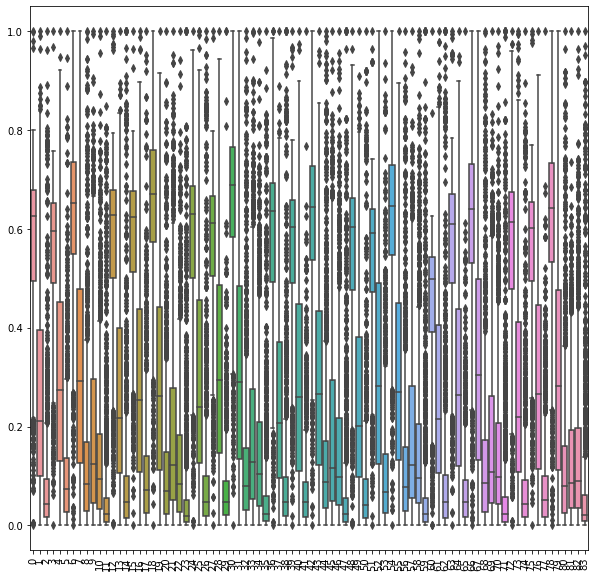

In [ ]:
#normal
box(normal_x)

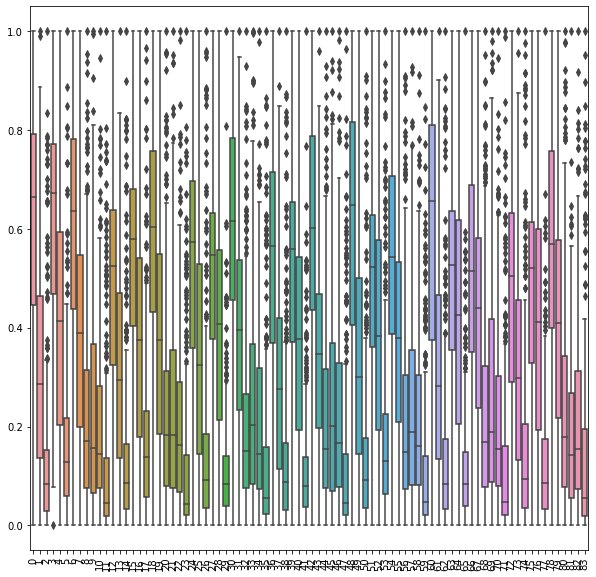

In [ ]:
#under sampling
box(cc_x_resample)

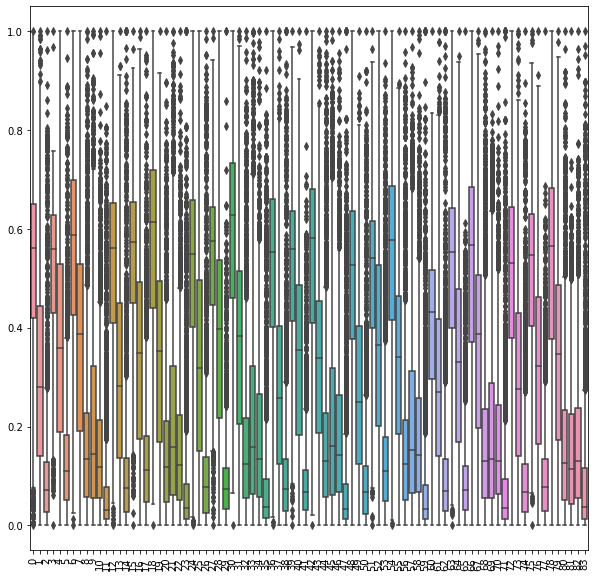

In [ ]:
#SMOTE
box(s_x_resample)

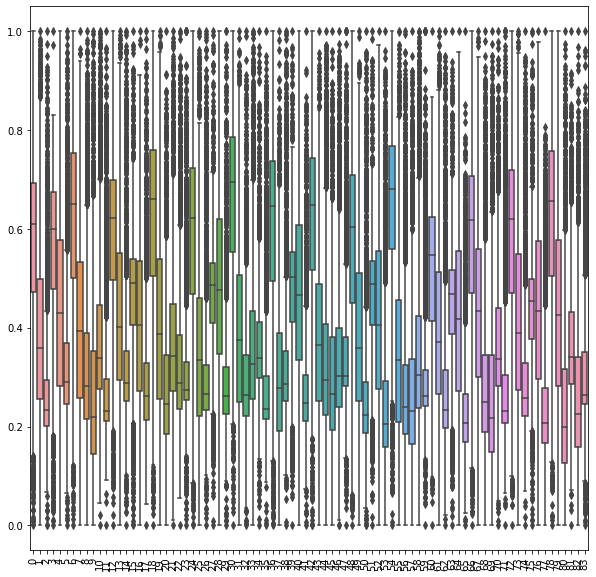

In [ ]:
#GAN
box(gan_x)

#Model building and training

##SVM

In [ ]:
import joblib

In [ ]:
from sklearn.metrics import classification_report
from sklearn import metrics

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.svm import SVC

In [ ]:
def svm_train(X,y):
  #call object
  svc = SVC()

  #set parameters
  tuned_parameters = [{'kernel': ['rbf'], 'gamma': [1e-3, 1e-4],
                     'C': [1, 10, 100, 1000]},
                    {'kernel': ['linear'], 'C': [1, 10, 100, 1000]}]

  #set grid search model
  clf = RandomizedSearchCV(svc, 
            tuned_parameters,
            n_jobs = -1, #n_jobs
            scoring = 'roc_auc', cv=10, #auc
            n_iter = 10, random_state=42,
            verbose = 1 #show process
            ) 

  #training
  clf.fit(X,y)

  #apply best model
  clf.best_params_
  print('------------------')
  print("=== best_set ===")
  print(clf.best_params_)

  #save best model
  model = clf.best_estimator_
  print('train score:',model.score(X,y))

  print('===')
  print('testing...')
  print('===')

  #test 
  #confusion metrix
  y_pred = model.predict(test_x)
  conf_mat = confusion_matrix(test_y, y_pred)
  plot_confusion_matrix(conf_mat, classes = ['no crash', 'crash'], title = 'Confusion Matrix')
  plt.show()

  #some index
  accuracy = ((conf_mat[0][0] + conf_mat[1][1]) / (conf_mat[0][0] + conf_mat[0][1] + conf_mat[1][1] + conf_mat[1][0]) ) 
  dr = conf_mat[1][1] / (conf_mat[1][0] + conf_mat[1][1] )
  far = conf_mat[0][1] / (conf_mat[0][0] + conf_mat[0][1] )
  print('accuracy:', accuracy,'\n'
      'detection rate:', dr,'\n'
      'false alarm rate:', far,'\n')
  
  #classification report
  print(classification_report(test_y, y_pred, target_names= ['no crash', 'crash'], digits=4))

  #Calculate AUC
  fpr, tpr, thresholds = metrics.roc_curve(test_y, y_pred)
  auc = metrics.auc(fpr, tpr)
  print('AUC is : ',auc)

  print('-------------------------')


  return model

Fitting 10 folds for each of 10 candidates, totalling 100 fits
------------------
=== best_set ===
{'kernel': 'rbf', 'gamma': 0.001, 'C': 1}
train score: 0.9167848699763593
===
testing...
===
Confusion matrix, without normalization
[[493   0]
 [ 36   0]]


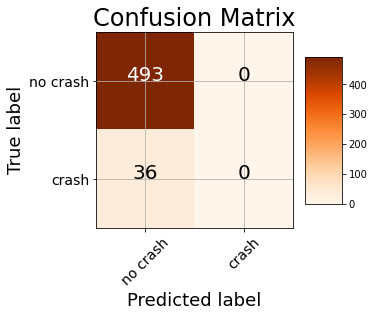

accuracy: 0.9319470699432892 
detection rate: 0.0 
false alarm rate: 0.0 

              precision    recall  f1-score   support

    no crash     0.9319    1.0000    0.9648       493
       crash     0.0000    0.0000    0.0000        36

    accuracy                         0.9319       529
   macro avg     0.4660    0.5000    0.4824       529
weighted avg     0.8685    0.9319    0.8991       529

AUC is :  0.5
-------------------------


['svm_normal_model.joblib']

In [ ]:
#normal
svm_normal_model = svm_train(normal_x, normal_y)
joblib.dump(svm_normal_model, 'svm_normal_model.joblib') 

Fitting 10 folds for each of 10 candidates, totalling 100 fits
------------------
=== best_set ===
{'kernel': 'linear', 'C': 1}
train score: 0.7301136363636364
===
testing...
===
Confusion matrix, without normalization
[[395  98]
 [  9  27]]


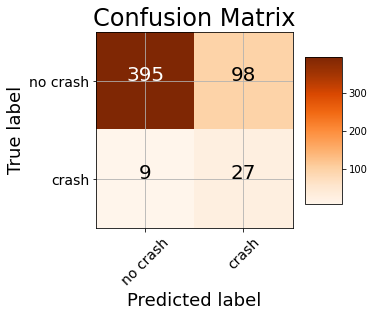

accuracy: 0.7977315689981096 
detection rate: 0.75 
false alarm rate: 0.19878296146044624 

              precision    recall  f1-score   support

    no crash     0.9777    0.8012    0.8807       493
       crash     0.2160    0.7500    0.3354        36

    accuracy                         0.7977       529
   macro avg     0.5969    0.7756    0.6081       529
weighted avg     0.9259    0.7977    0.8436       529

AUC is :  0.7756085192697768
-------------------------


['svm_under_model.joblib']

In [ ]:
#under
svm_under_model = svm_train(cc_x_resample, cc_y_resample)
joblib.dump(svm_under_model, 'svm_under_model.joblib') 

Fitting 10 folds for each of 10 candidates, totalling 100 fits
------------------
=== best_set ===
{'kernel': 'linear', 'C': 10}
train score: 0.8045384218669417
===
testing...
===
Confusion matrix, without normalization
[[393 100]
 [  6  30]]


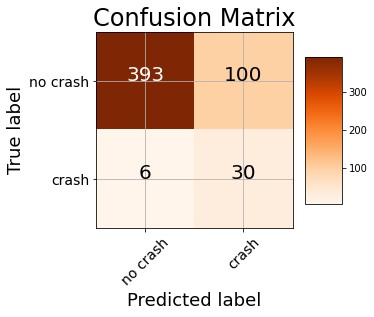

accuracy: 0.7996219281663516 
detection rate: 0.8333333333333334 
false alarm rate: 0.2028397565922921 

              precision    recall  f1-score   support

    no crash     0.9850    0.7972    0.8812       493
       crash     0.2308    0.8333    0.3614        36

    accuracy                         0.7996       529
   macro avg     0.6079    0.8152    0.6213       529
weighted avg     0.9336    0.7996    0.8458       529

AUC is :  0.8152467883705207
-------------------------


['svm_SMOTE_model.joblib']

In [ ]:
#SMOTE
svm_SMOTE_model = svm_train(s_x_resample, s_y_resample)
joblib.dump(svm_SMOTE_model, 'svm_SMOTE_model.joblib') 

Fitting 10 folds for each of 10 candidates, totalling 100 fits
------------------
=== best_set ===
{'kernel': 'rbf', 'gamma': 0.001, 'C': 100}
train score: 0.9146467251160392
===
testing...
===
Confusion matrix, without normalization
[[437  56]
 [ 11  25]]


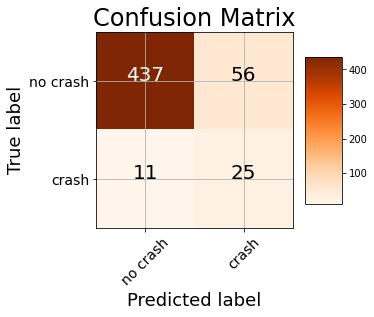

accuracy: 0.8733459357277883 
detection rate: 0.6944444444444444 
false alarm rate: 0.11359026369168357 

              precision    recall  f1-score   support

    no crash     0.9754    0.8864    0.9288       493
       crash     0.3086    0.6944    0.4274        36

    accuracy                         0.8733       529
   macro avg     0.6420    0.7904    0.6781       529
weighted avg     0.9301    0.8733    0.8947       529

AUC is :  0.7904270903763804
-------------------------


['svm_GAN_model.joblib']

In [ ]:
#GAN
svm_GAN_model = svm_train(gan_x, gan_y)
joblib.dump(svm_GAN_model, 'svm_GAN_model.joblib') 

##Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
def rf_train(X,y):
  #call object
  rfclassifier = RandomForestClassifier(n_estimators= 100,
                    criterion='gini',
                    random_state= 50,
                    oob_score = True, #bagging
                    bootstrap = True,
                              )

  # set hyperparameters
  param_grid = {'n_estimators': np.linspace(10, 200).astype(int), #int
              'max_depth': [None] + list(np.linspace(3, 20).astype(int)), #int
              'max_features': ['auto', 'sqrt', None] + list(np.arange(0.5, 1, 0.1)),
              'max_leaf_nodes': [None] + list(np.linspace(10, 50, 500).astype(int)),
              'min_samples_split': [2, 5, 10],
              }

  #set grid search model
  rs = RandomizedSearchCV(rfclassifier, param_grid, n_jobs = -1, #n_jobs
                        scoring = 'roc_auc', cv=10, #auc
                        n_iter = 10, verbose = 1, random_state=42) #show process

  #training
  rs.fit(X,y)

  #apply best model
  rs.best_params_
  print('------------------')
  print("=== best_set ===")
  print(rs.best_params_)

  #save best model
  model = rs.best_estimator_
  print('score:',model.score(X,y))

  print('===')
  print('testing...')
  print('===')

  #test 
  #confusion metrix
  y_pred = model.predict(test_x)
  conf_mat = confusion_matrix(test_y, y_pred)
  plot_confusion_matrix(conf_mat, classes = ['no crash', 'crash'], title = 'Confusion Matrix')
  plt.show()

  #some index
  accuracy = ((conf_mat[0][0] + conf_mat[1][1]) / (conf_mat[0][0] + conf_mat[0][1] + conf_mat[1][1] + conf_mat[1][0]) ) 
  dr = conf_mat[1][1] / (conf_mat[1][0] + conf_mat[1][1] )
  far = conf_mat[0][1] / (conf_mat[0][0] + conf_mat[0][1] )
  print('accuracy:', accuracy,'\n'
      'detection rate:', dr,'\n'
      'false alarm rate:', far,'\n')
  
  #classification report
  print(classification_report(test_y, y_pred, target_names= ['no crash', 'crash'], digits=4))

  #Calculate AUC
  fpr, tpr, thresholds = metrics.roc_curve(test_y, y_pred)
  auc = metrics.auc(fpr, tpr)
  print('AUC is : ',auc)

  print('-------------------------')

  return model

Fitting 10 folds for each of 10 candidates, totalling 100 fits
------------------
=== best_set ===
{'n_estimators': 157, 'min_samples_split': 2, 'max_leaf_nodes': 31, 'max_features': 'auto', 'max_depth': 14}
score: 0.9626477541371158
===
testing...
===
Confusion matrix, without normalization
[[489   4]
 [ 26  10]]


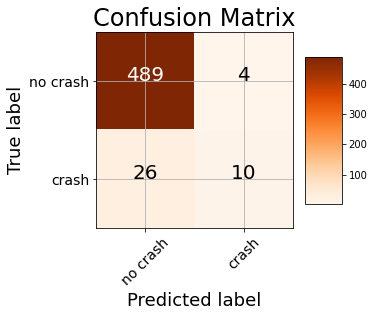

accuracy: 0.943289224952741 
detection rate: 0.2777777777777778 
false alarm rate: 0.008113590263691683 

              precision    recall  f1-score   support

    no crash     0.9495    0.9919    0.9702       493
       crash     0.7143    0.2778    0.4000        36

    accuracy                         0.9433       529
   macro avg     0.8319    0.6348    0.6851       529
weighted avg     0.9335    0.9433    0.9314       529

AUC is :  0.634832093757043
-------------------------


['rf_normal_model.joblib']

In [ ]:
#normal
rf_normal_model = rf_train(normal_x, normal_y)
joblib.dump(rf_normal_model, 'rf_normal_model.joblib') 

Fitting 10 folds for each of 10 candidates, totalling 100 fits
------------------
=== best_set ===
{'n_estimators': 196, 'min_samples_split': 10, 'max_leaf_nodes': 49, 'max_features': 0.7, 'max_depth': 17}
score: 1.0
===
testing...
===
Confusion matrix, without normalization
[[295 198]
 [  8  28]]


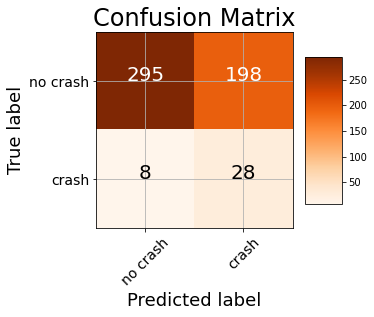

accuracy: 0.610586011342155 
detection rate: 0.7777777777777778 
false alarm rate: 0.40162271805273836 

              precision    recall  f1-score   support

    no crash     0.9736    0.5984    0.7412       493
       crash     0.1239    0.7778    0.2137        36

    accuracy                         0.6106       529
   macro avg     0.5487    0.6881    0.4775       529
weighted avg     0.9158    0.6106    0.7053       529

AUC is :  0.6880775298625197
-------------------------


['rf_under_model.joblib']

In [ ]:
#under
rf_under_model = rf_train(cc_x_resample, cc_y_resample)
joblib.dump(rf_under_model, 'rf_under_model.joblib') 

Fitting 10 folds for each of 10 candidates, totalling 100 fits
------------------
=== best_set ===
{'n_estimators': 196, 'min_samples_split': 10, 'max_leaf_nodes': 49, 'max_features': 0.7, 'max_depth': 17}
score: 0.9646725116039195
===
testing...
===
Confusion matrix, without normalization
[[446  47]
 [ 10  26]]


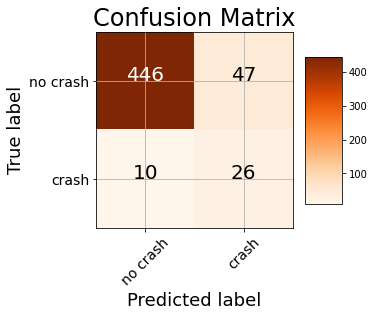

accuracy: 0.8922495274102079 
detection rate: 0.7222222222222222 
false alarm rate: 0.09533468559837728 

              precision    recall  f1-score   support

    no crash     0.9781    0.9047    0.9399       493
       crash     0.3562    0.7222    0.4771        36

    accuracy                         0.8922       529
   macro avg     0.6671    0.8134    0.7085       529
weighted avg     0.9357    0.8922    0.9084       529

AUC is :  0.8134437683119226
-------------------------


['rf_SMOTE_model.joblib']

In [ ]:
#SMOTE
rf_SMOTE_model = rf_train(s_x_resample, s_y_resample)
joblib.dump(rf_SMOTE_model, 'rf_SMOTE_model.joblib') 

Fitting 10 folds for each of 10 candidates, totalling 100 fits
------------------
=== best_set ===
{'n_estimators': 157, 'min_samples_split': 2, 'max_leaf_nodes': 31, 'max_features': 'auto', 'max_depth': 14}
score: 0.9646725116039195
===
testing...
===
Confusion matrix, without normalization
[[466  27]
 [ 12  24]]


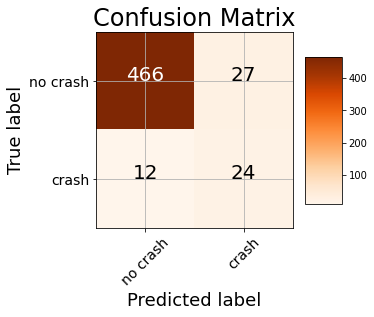

accuracy: 0.9262759924385633 
detection rate: 0.6666666666666666 
false alarm rate: 0.05476673427991886 

              precision    recall  f1-score   support

    no crash     0.9749    0.9452    0.9598       493
       crash     0.4706    0.6667    0.5517        36

    accuracy                         0.9263       529
   macro avg     0.7227    0.8059    0.7558       529
weighted avg     0.9406    0.9263    0.9321       529

AUC is :  0.8059499661933738
-------------------------


['rf_GAN_model.joblib']

In [ ]:
#GAN
rf_GAN_model = rf_train(gan_x, gan_y)
joblib.dump(rf_GAN_model, 'rf_GAN_model.joblib') 

##XGBoost

In [ ]:
from xgboost import XGBClassifier

In [ ]:
def xg_train(X,y):
  #call object
  xgbc = XGBClassifier(n_estimators=200,learning_rate=0.01)

  # set hyperparameters
  params = {
        'min_child_weight': [1, 5, 10],
        'gamma': [0.5, 1, 1.5, 2, 5],
        'subsample': [0.6, 0.8, 1.0],
        'colsample_bytree': [0.6, 0.8, 1.0],
        'max_depth': [3, 4, 5]
        }


  #set grid search model
  xgb = RandomizedSearchCV(xgbc, params, n_jobs = -1, #n_jobs
                        scoring = 'roc_auc', cv=10, #auc
                        n_iter = 10, verbose = 1, random_state=42) #show process

  #training
  xgb.fit(X,y)

  #apply best model
  xgb.best_params_
  print('------------------')
  print("=== best_set ===")
  print(xgb.best_params_)

  #save best model
  model = xgb.best_estimator_
  print('score:',model.score(X,y))

  print('===')
  print('testing...')
  print('===')

  #test 
  #confusion metrix
  y_pred = model.predict(test_x)
  conf_mat = confusion_matrix(test_y, y_pred)
  plot_confusion_matrix(conf_mat, classes = ['no crash', 'crash'], title = 'Confusion Matrix')
  plt.show()

  #some index
  accuracy = ((conf_mat[0][0] + conf_mat[1][1]) / (conf_mat[0][0] + conf_mat[0][1] + conf_mat[1][1] + conf_mat[1][0]) ) 
  dr = conf_mat[1][1] / (conf_mat[1][0] + conf_mat[1][1] )
  far = conf_mat[0][1] / (conf_mat[0][0] + conf_mat[0][1] )
  print('accuracy:', accuracy,'\n'
      'detection rate:', dr,'\n'
      'false alarm rate:', far,'\n')
  
  #classification report
  print(classification_report(test_y, y_pred, target_names= ['no crash', 'crash'], digits=4))

  #Calculate AUC
  fpr, tpr, thresholds = metrics.roc_curve(test_y, y_pred)
  auc = metrics.auc(fpr, tpr)
  print('AUC is : ',auc)

  print('-------------------------')

  return model

Fitting 10 folds for each of 10 candidates, totalling 100 fits
------------------
=== best_set ===
{'subsample': 0.8, 'min_child_weight': 5, 'max_depth': 5, 'gamma': 5, 'colsample_bytree': 0.8}
score: 0.948936170212766
===
testing...
===
Confusion matrix, without normalization
[[488   5]
 [ 23  13]]


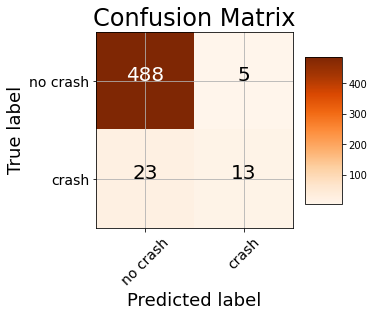

accuracy: 0.947069943289225 
detection rate: 0.3611111111111111 
false alarm rate: 0.010141987829614604 

              precision    recall  f1-score   support

    no crash     0.9550    0.9899    0.9721       493
       crash     0.7222    0.3611    0.4815        36

    accuracy                         0.9471       529
   macro avg     0.8386    0.6755    0.7268       529
weighted avg     0.9391    0.9471    0.9387       529

AUC is :  0.6754845616407483
-------------------------


['xg_normal_model.joblib']

In [ ]:
#normal
xg_normal_model = xg_train(normal_x, normal_y)
joblib.dump(xg_normal_model, 'xg_normal_model.joblib') 

Fitting 10 folds for each of 10 candidates, totalling 100 fits
------------------
=== best_set ===
{'subsample': 1.0, 'min_child_weight': 1, 'max_depth': 3, 'gamma': 0.5, 'colsample_bytree': 0.8}
score: 0.8977272727272727
===
testing...
===
Confusion matrix, without normalization
[[320 173]
 [  6  30]]


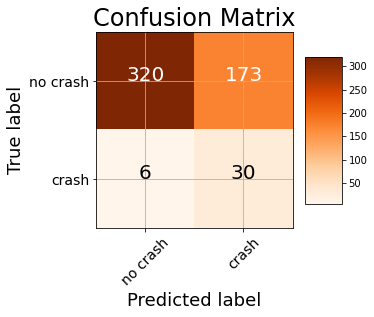

accuracy: 0.6616257088846881 
detection rate: 0.8333333333333334 
false alarm rate: 0.3509127789046653 

              precision    recall  f1-score   support

    no crash     0.9816    0.6491    0.7814       493
       crash     0.1478    0.8333    0.2510        36

    accuracy                         0.6616       529
   macro avg     0.5647    0.7412    0.5162       529
weighted avg     0.9249    0.6616    0.7453       529

AUC is :  0.7412102772143341
-------------------------


['xg_under_model.joblib']

In [ ]:
#under
xg_under_model = xg_train(cc_x_resample, cc_y_resample)
joblib.dump(xg_under_model, 'xg_under_model.joblib') 

Fitting 10 folds for each of 10 candidates, totalling 100 fits
------------------
=== best_set ===
{'subsample': 1.0, 'min_child_weight': 5, 'max_depth': 5, 'gamma': 1.5, 'colsample_bytree': 0.6}
score: 0.9417225373904075
===
testing...
===
Confusion matrix, without normalization
[[431  62]
 [  7  29]]


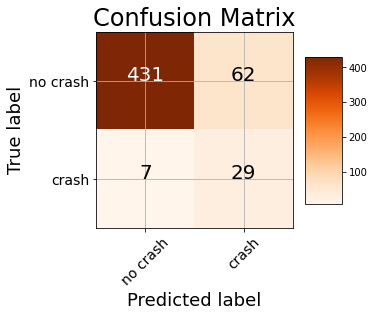

accuracy: 0.8695652173913043 
detection rate: 0.8055555555555556 
false alarm rate: 0.1257606490872211 

              precision    recall  f1-score   support

    no crash     0.9840    0.8742    0.9259       493
       crash     0.3187    0.8056    0.4567        36

    accuracy                         0.8696       529
   macro avg     0.6513    0.8399    0.6913       529
weighted avg     0.9387    0.8696    0.8940       529

AUC is :  0.8398974532341673
-------------------------


['xg_SMOTE_model.joblib']

In [ ]:
#SMOTE
xg_SMOTE_model = xg_train(s_x_resample, s_y_resample)
joblib.dump(xg_SMOTE_model, 'xg_SMOTE_model.joblib') 

Fitting 10 folds for each of 10 candidates, totalling 100 fits
------------------
=== best_set ===
{'subsample': 0.6, 'min_child_weight': 10, 'max_depth': 4, 'gamma': 1, 'colsample_bytree': 0.6}
score: 0.9636410520887055
===
testing...
===
Confusion matrix, without normalization
[[471  22]
 [ 13  23]]


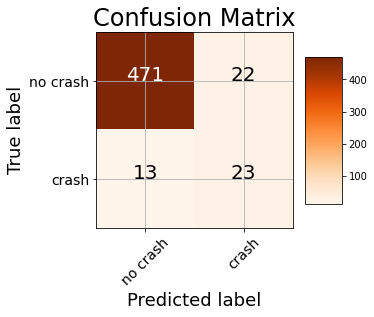

accuracy: 0.9338374291115312 
detection rate: 0.6388888888888888 
false alarm rate: 0.04462474645030426 

              precision    recall  f1-score   support

    no crash     0.9731    0.9554    0.9642       493
       crash     0.5111    0.6389    0.5679        36

    accuracy                         0.9338       529
   macro avg     0.7421    0.7971    0.7660       529
weighted avg     0.9417    0.9338    0.9372       529

AUC is :  0.7971320712192923
-------------------------


['xg_GAN_model.joblib']

In [ ]:
#GAN
xg_GAN_model = xg_train(gan_x, gan_y)
joblib.dump(xg_GAN_model, 'xg_GAN_model.joblib') 

##LSTM

In [ ]:
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation
from keras.layers.recurrent import LSTM
from keras.models import load_model
import keras
from keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras import layers

In [ ]:
from keras.layers.normalization import BatchNormalization

In [ ]:
def create_model():
	# create model
  model = Sequential()
  model.add(LSTM(100, return_sequences=True, input_shape = (7,12) ) )
  model.add(Dropout(0.3))

  model.add(LSTM(84) )
  model.add(Dropout(0.2))

  model.add(Dense(64,activation='relu'))
  model.add(Dense(32,activation='relu'))
  model.add(Dense(1,activation='sigmoid'))


	# Compile model
  model.compile(optimizer='adam',loss='binary_crossentropy',metrics='accuracy')
 

  #model.summary()
 
  return  model

In [ ]:
test_time_x = test_x

In [ ]:
test_time_x = test_time_x.to_numpy()

In [ ]:
test_time_x = test_time_x .reshape((test_time_x .shape[0], 7 ,12))

In [ ]:
np.random.seed(2021)

In [ ]:
def lstm_train(X,y):

  #adjust X and y shape
  X = X.to_numpy()
  y = y.to_numpy()

  X = X.reshape((X.shape[0], 7 ,12))

  #build model
  model = Sequential()
  model.add(LSTM(100, return_sequences=True, input_shape = (7,12) ) )
  model.add(Dropout(0.5))

  model.add(LSTM(84)) 
  model.add(Dropout(0.2))

  model.add(Dense(64,activation='relu'))

  model.add(Dense(32,activation='relu'))

  model.add(Dense(1,activation='sigmoid'))

  model.compile(optimizer='adam',
      loss='binary_crossentropy', 
      metrics='accuracy')
  
  #early stop
  es = EarlyStopping(monitor='val_loss', mode='min', verbose=1)

  #train
  model.fit(X, y, epochs=100, batch_size=32,validation_split=0.1,callbacks=[es])


  print('===')
  print('testing...')
  print('===')

  #test 
  #confusion metrix
  y_pred = model.predict_classes(test_time_x)
  conf_mat = confusion_matrix(test_y, y_pred)
  plot_confusion_matrix(conf_mat, classes = ['no crash', 'crash'], title = 'Confusion Matrix')
  plt.show()

  #some index
  accuracy = ((conf_mat[0][0] + conf_mat[1][1]) / (conf_mat[0][0] + conf_mat[0][1] + conf_mat[1][1] + conf_mat[1][0]) ) 
  dr = conf_mat[1][1] / (conf_mat[1][0] + conf_mat[1][1] )
  far = conf_mat[0][1] / (conf_mat[0][0] + conf_mat[0][1] )
  print('accuracy:', accuracy,'\n'
      'detection rate:', dr,'\n'
      'false alarm rate:', far,'\n')
  
  #classification report
  print(classification_report(test_y, y_pred, target_names= ['no crash', 'crash'], digits=4))

  #Calculate AUC
  fpr, tpr, thresholds = metrics.roc_curve(test_y, y_pred)
  auc = metrics.auc(fpr, tpr)
  print('AUC is : ',auc)

  print('-------------------------')

  return model

Epoch 1/100
6/6 [==============================] - 27s 378ms/step - loss: 0.6654 - accuracy: 0.8917 - val_loss: 0.5439 - val_accuracy: 0.9434
===
testing...
===
Confusion matrix, without normalization
[[493   0]
 [ 36   0]]


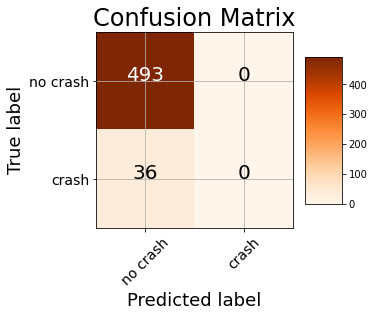

accuracy: 0.9319470699432892 
detection rate: 0.0 
false alarm rate: 0.0 

              precision    recall  f1-score   support

    no crash     0.9319    1.0000    0.9648       493
       crash     0.0000    0.0000    0.0000        36

    accuracy                         0.9319       529
   macro avg     0.4660    0.5000    0.4824       529
weighted avg     0.8685    0.9319    0.8991       529

AUC is :  0.5
-------------------------


In [ ]:
#normal
lstm_normal_model = lstm_train(normal_x, normal_y)
lstm_normal_model.save('lstm_normal_model.h5')

Epoch 1/100
1/1 [==============================] - 7s 7s/step - loss: 0.6941 - accuracy: 0.4684 - val_loss: 0.7061 - val_accuracy: 0.0000e+00
===
testing...
===
Confusion matrix, without normalization
[[493   0]
 [ 36   0]]


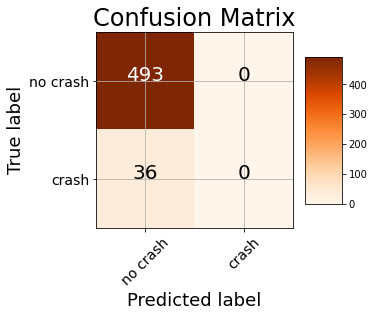

accuracy: 0.9319470699432892 
detection rate: 0.0 
false alarm rate: 0.0 

              precision    recall  f1-score   support

    no crash     0.9319    1.0000    0.9648       493
       crash     0.0000    0.0000    0.0000        36

    accuracy                         0.9319       529
   macro avg     0.4660    0.5000    0.4824       529
weighted avg     0.8685    0.9319    0.8991       529

AUC is :  0.5
-------------------------


In [ ]:
#under
lstm_under_model = lstm_train(cc_x_resample, cc_y_resample)
lstm_under_model.save('lstm_under_model.h5')

Epoch 1/100
110/110 [==============================] - 15s 73ms/step - loss: 0.6097 - accuracy: 0.6798 - val_loss: 0.6839 - val_accuracy: 0.6521
===
testing...
===
Confusion matrix, without normalization
[[383 110]
 [  4  32]]


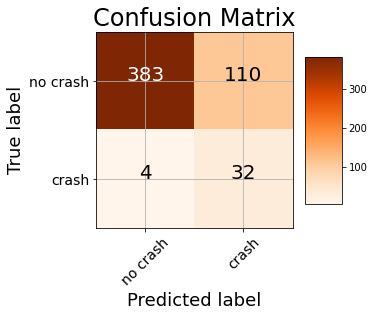

accuracy: 0.7844990548204159 
detection rate: 0.8888888888888888 
false alarm rate: 0.2231237322515213 

              precision    recall  f1-score   support

    no crash     0.9897    0.7769    0.8705       493
       crash     0.2254    0.8889    0.3596        36

    accuracy                         0.7845       529
   macro avg     0.6075    0.8329    0.6150       529
weighted avg     0.9377    0.7845    0.8357       529

AUC is :  0.8328825783186837
-------------------------


In [ ]:
#SMOTE
lstm_SMOTE_model = lstm_train(s_x_resample, s_y_resample)
lstm_SMOTE_model.save('lstm_SMOTE_model.h5')

Epoch 1/100
110/110 [==============================] - 14s 76ms/step - loss: 0.5231 - accuracy: 0.7769 - val_loss: 0.5094 - val_accuracy: 0.7887
===
testing...
===
Confusion matrix, without normalization
[[392 101]
 [  4  32]]


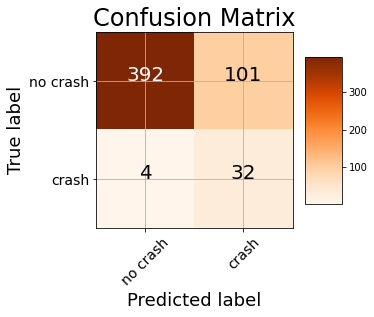

accuracy: 0.8015122873345936 
detection rate: 0.8888888888888888 
false alarm rate: 0.20486815415821502 

              precision    recall  f1-score   support

    no crash     0.9899    0.7951    0.8819       493
       crash     0.2406    0.8889    0.3787        36

    accuracy                         0.8015       529
   macro avg     0.6153    0.8420    0.6303       529
weighted avg     0.9389    0.8015    0.8476       529

AUC is :  0.842010367365337
-------------------------


In [ ]:
#GAN
lstm_GAN_model = lstm_train(gan_x, gan_y)
lstm_GAN_model.save('lstm_GAN_model.h5')

###LSTM visulization

In [ ]:
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation
from keras.layers.recurrent import LSTM
from keras.models import load_model
import keras
from keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras import layers

In [ ]:
  model = Sequential()
  model.add(LSTM(100, return_sequences=True, input_shape = (7,12) ) )
  model.add(Dropout(0.3))

  model.add(LSTM(84)) 
  model.add(Dropout(0.2))

  model.add(Dense(64,activation='relu'))
  model.add(Dense(32,activation='relu'))
  model.add(Dense(1,activation='sigmoid'))

  model.compile(optimizer='adam',
      loss='binary_crossentropy', 
      metrics='accuracy')

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 7, 100)            45200     
_________________________________________________________________
dropout (Dropout)            (None, 7, 100)            0         
_________________________________________________________________
lstm_1 (LSTM)                (None, 84)                62160     
_________________________________________________________________
dropout_1 (Dropout)          (None, 84)                0         
_________________________________________________________________
dense (Dense)                (None, 64)                5440      
_________________________________________________________________
dense_1 (Dense)              (None, 32)                2080      
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 3

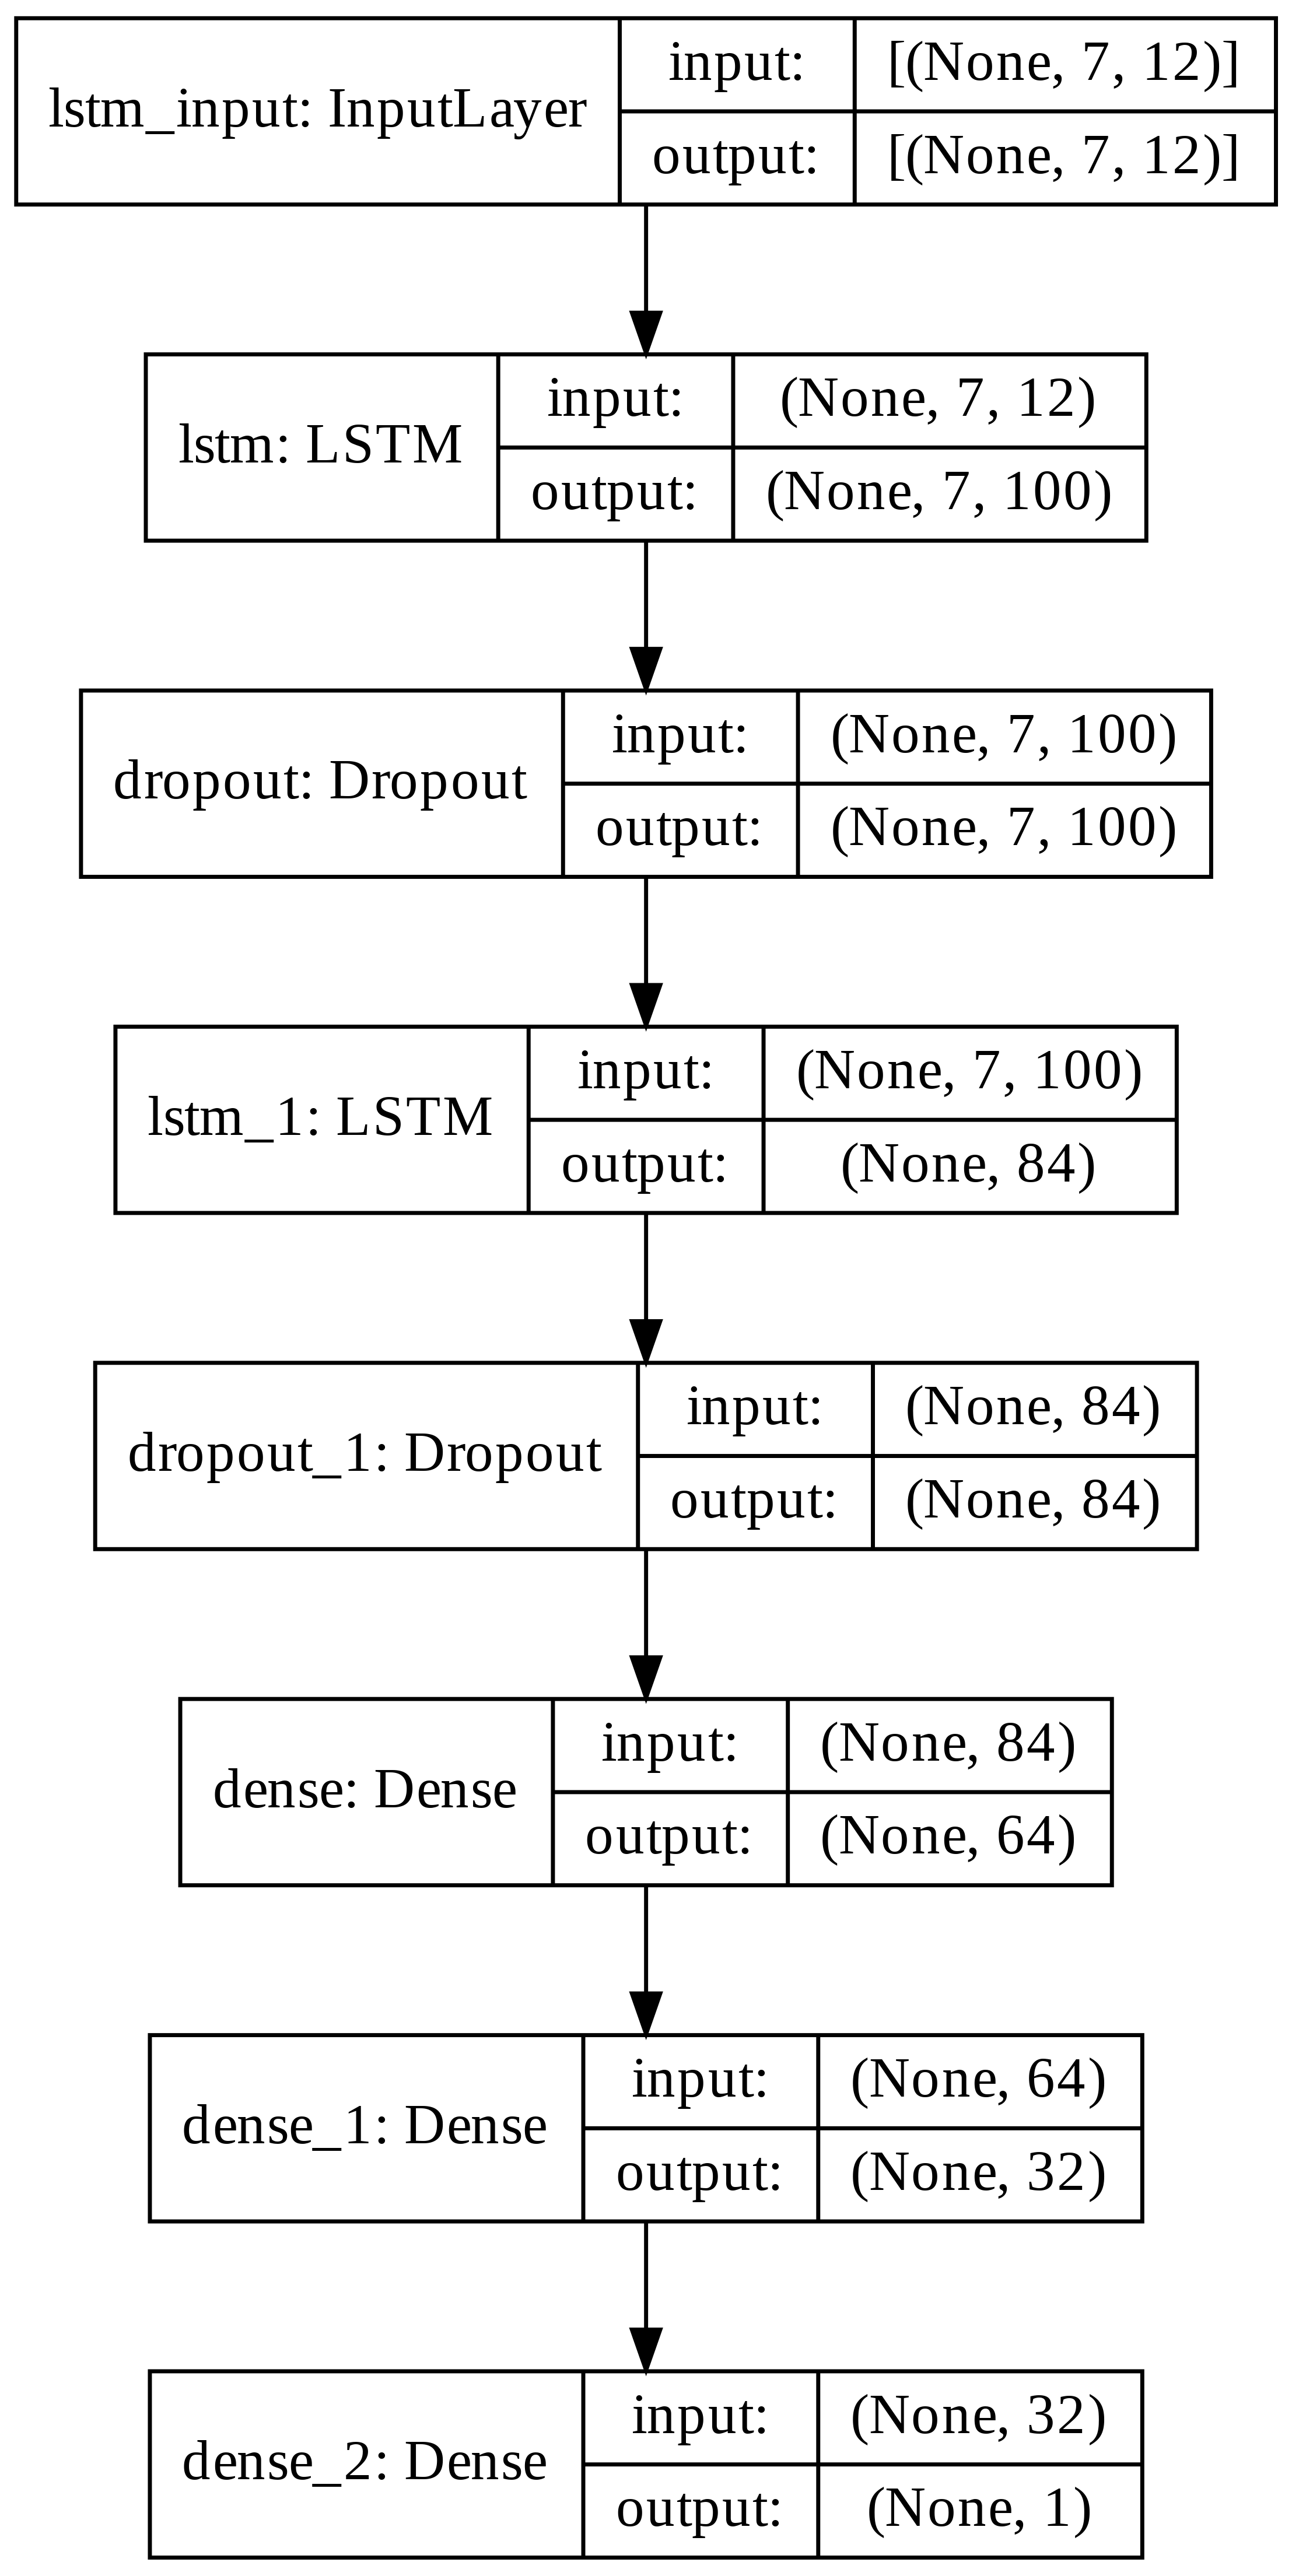

In [ ]:
model.summary()
from keras.utils import plot_model
plot_model(model, show_layer_names=True, show_shapes=True, to_file='lstm_model.png',dpi=500)
from IPython.display import Image
Image('lstm_model.png')